<img src="yaro.png" align="right" width="500"/>
<h1 style="color:firebrick">Анализ оттока клиентов регионального банка</h1> 

<h2 style="color:white"> </h2>
<div style ="color:navy; font-size:16pt"><b>Описание проекта</b></div>

Поступило задание от отдела маркентинга банка «Метанпром». Банк располагается в Ярославле и областных городах Ростов Великий и Рыбинск. 

В банке последнее время сильно повысился отток клиентов. Проблема угрожает существованию банка. 

Менеджерам маркетинга и продуктов требуется максимально эффективно выделить сегменты отточных клиентов, чтобы 
воздействуя на эти сегменты, уменьшить потери.

<div style ="color:navy; font-size:12pt"><b>Цели проекта</b></div>

1. Выделить описать наиболее однородные высокоотточные сегменты клиентов, которые покрывают максимум проблемных зон банка. Чтобы маркетинговое воздействие на эти сегменты могло привести к уменьшению оттока клиентов.


2. Подготовить понятную презентацию и дашборд для аргументации выводов по проекту.


3. Научиться работать в команде и действовать в интересах заказчика и в соответствии с рекомендациями коллег.

<div style ="color:navy; font-size:12pt"><b>Ход исследования</b></div>

1. [**Предобработка данных**](#Предобработка-данных)
- обработать пропущенные значения;
- преобразовать типы данных в таблице если это необходимо;
- проверить на наличие явных и неявных дубликатов;
- в качестве итога описать поля подготовленного для работы датасета.

2. [**Функции и переменные**](#Функции-и-переменные)

- определения функций, используемых в проекте для визуализации.

3. [**Исследовательский анализ**](#Исследовательский-анализ)
- найти общее количество и процент ушедших клиентов;
- проверить распределение для остальных количественных и категориальных параметров, посмотреть на наличие выбросов для количественных параметров;
- определить какие записи можно считать выбросами, а какие оставить для дальнейшего анализа в качестве "очищенных" данных;
- изучить распределение всех параметров в разрезе оттока;
- нарисовать и сравнить портреты двух среднестатистических клиентов - оставшегося и ушедшего из банка;
- с помощью корреляционного анализа выявить параметры, наибольшим образом влияющие на отток;
- сформулировать выводы: описание особенностей среднестатистического клиента, ушедшего из банка и перечисление предположительно влияющих на отток параметров.

4. [**Проверка гипотез**](#Проверка-гипотез)

- на основе проведённого корреляционного анализа сформулировать несколько гипотез, в том числе: *«Есть статистически значимые различия дохода между теми клиентами, которые ушли и теми, которые остались»*;
- выбрать подходящий статистический критерий для проверки каждой из гипотез, отследить применимость критерия к имеющимся данным;
- осуществить проверку;
- итогом станут параметры, влияние которых на отток клиентов действительно значимо, и описание особенностей влияния.

5. [**Сегментация клиентов**](#Сегментация-клиент)

- внутри значимо влияющих параметров найти стратегические признаки - значения или интервалы параметров, связаных с оттоком клиентов;
- выделить не мелкие, но компактные высокоотточные сегменты (по пересечению стратегических признаков); 
- приоритизировать отобранные сегменты по количеству клиентов и их общему влиянию на отток;
- в качестве выводов описать приоритетные сегменты.

6. [**Выводы**](#Выводы)
- дать рекомендации по приоритетным сегментам;
- подготовить <a href="https://drive.google.com/file/d/1PSwpXS9eUn6lwWg3UWKkZLsnZDiwDzKv/view?usp=share_link">презентацию</a> с ключевыми моментами исследования;
- создать <a href="https://public.tableau.com/views/_16802092224080/sheet0?:language=en-US&:display_count=n&:origin=viz_share_link">дашборд</a> с помощью Tableau. 

<hr style="background-color:navy; align:left; height:2pt">

<h2 style="color:navy">Предобработка данных</h2>

### Загрузка библиотек и файлов

In [1]:
# импорт библиотек
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import phik
from scipy import stats as st

from itertools import combinations

In [ ]:
# код для установки отсутствующих библиотек
# ! pip install phik
# ! pip install itertools

In [2]:
# загрузка датасета с информацией о клиентах банка
try: 
    bank = pd.read_csv('bank_scrooge.csv')
except:
    val_tmp = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F"
    bank = pd.read_csv(val_tmp)

### Знакомство с данными

In [3]:
# проверим названия столбцов, типы данных и пропуски
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Переведём названия полей в нижний регистр и переименуем удобно

In [4]:
# переведём имена полей в нижний регистр
bank.columns = bank.columns.str.lower()
# переименуем некоторые столбцы для удобства
bank.columns = bank.columns.str.replace('user|credit_|est_|last_', '', regex=True)

In [5]:
# посмотрим что получилось
display(bank.sample(5))

,id,score,city,gender,age,equity,balance,products,card,activity,salary,churn
6762,150990,790.0,Ярославль,М,37.0,3,293606.24,2,1,1,87381.80,0
9708,119623,893.0,Рыбинск,М,34.0,2,848281.96,1,1,0,116153.25,0
3322,225538,792.0,Ростов,Ж,34.0,1,90777.09,1,1,1,114959.91,0
3343,158611,810.0,Ростов,М,65.0,3,509114.68,1,1,0,93976.73,0
9640,168314,756.0,Рыбинск,Ж,43.0,0,NaN,1,1,0,276846.30,0


### Пропущенные значения

Мы уже видели по информации о таблице, что пропущенные значения есть в двух столбцах. Подсчитаем их долю

In [6]:
df_tmp = bank.isna().sum().to_frame()
df_tmp.columns = ['nan_count']
df_tmp['nan_mean'] = bank.isna().mean()
df_tmp = df_tmp.query('nan_count>0')
display(df_tmp.style.format('{:0.2%}', subset='nan_mean'))

,nan_count,nan_mean
age,26,0.26%
balance,2295,22.95%


Выведем несколько строк тех клиентов, которые "скрыли" свой возраст.

In [7]:
display(bank.query('age.isna()').sample(5))

,id,score,city,gender,age,equity,balance,products,card,activity,salary,churn
8785,127440,663.0,Ярославль,М,NaN,0,NaN,1,1,1,117197.56,0
9380,187459,894.0,Рыбинск,М,NaN,0,NaN,1,1,0,178012.28,0
9634,221809,917.0,Ярославль,М,NaN,0,NaN,1,1,1,192644.15,0
9667,163657,849.0,Ярославль,М,NaN,4,1254013.85,2,1,1,119106.67,0
8070,226550,940.0,Рыбинск,М,NaN,0,NaN,1,0,1,147696.95,0


Больше похоже на какую-то ошибку в данных - нет информации о возрасте, для тех, у кого в банке оформлена кредитная карта или довольно внушительный баланс на счету. Так как такие клиенты составляют всего лишь около четверти процента от всех данных - удалим эти строки. 

In [8]:
# оставим только те записи, в которых указан возраст
bank = bank.query('age.notna()').reset_index(drop=True)

Теперь "разберёмся" с балансом. Для начала посмотрим, есть ли клиенты с нулевым балансом.

In [9]:
display(bank.query('balance==0'))

,id,score,city,gender,age,equity,balance,products,card,activity,salary,churn
3896,179831,730.0,Ярославль,М,18.0,0,0.0,2,1,1,64548.33,0
6750,148456,813.0,Ярославль,М,20.0,2,0.0,2,1,0,23876.51,0


У нас только два студента из Ярославля с нулевыми значениями баланса. 

Скорее всего пропущенные значения  в данном поле означают отсутствие счёта в банке. Клиент пользуется другими услугами нашего банка, не создавая расчётный счёт. Причём таких строк почти четверть от всего количества. Не будем спешить заменять пропуски этого столбца нулями, так как многие статистические методы не учитывают при анализе значения `Nan`. Если понадобится, то в любой момент можем это сделать.

Можем добавить еще один столбец, указывающий наличие или отсутствие средств на счету. Сможем проанализировать и эту информацию, чтобы каждый раз не проверять наличие пропусков.

In [10]:
bank['account'] = ~ bank.balance.isna()

# проверим
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9974 entries, 0 to 9973
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        9974 non-null   int64  
 1   score     9974 non-null   float64
 2   city      9974 non-null   object 
 3   gender    9974 non-null   object 
 4   age       9974 non-null   float64
 5   equity    9974 non-null   int64  
 6   balance   7695 non-null   float64
 7   products  9974 non-null   int64  
 8   card      9974 non-null   int64  
 9   activity  9974 non-null   int64  
 10  salary    9974 non-null   float64
 11  churn     9974 non-null   int64  
 12  account   9974 non-null   bool   
dtypes: bool(1), float64(4), int64(6), object(2)
memory usage: 944.9+ KB


### Типы данных

#### Целые числа

Выберем столбцы, значения в которых можно заменить на целое

In [11]:
display(bank.select_dtypes(include=['float64', 'int64']).agg(['min', 'max', 'dtype']))

,id,score,age,equity,balance,products,card,activity,salary,churn
min,94561,642.0,18.0,0,0.0,0,0,0,2546.3,0
max,229145,1000.0,86.0,9,119113552.01,5,1,1,1395064.45,1
dtype,int64,float64,float64,int64,float64,int64,int64,int64,float64,int64


Сделаем следующее:

1. Округлим до тысяч значения `salary` и `balance`, предварительно проверив насколько много клиентов имеют баланс меньше 1 тыс.руб.
2. Поменяем на целочисленный тип данных в столбцах `score`, `age` и `salary`. Значения баланса перевести в целое не получится из-за пропусков.
3. Уменьшим размерность `equity` и `products`.
4. Посмотрим, что за клиенты, которые вообще не пользуются продуктами нашего банка (`products`=0)

In [12]:
val_tmp = bank.query('balance < 1000').balance.count()
print(f'Число клиентов, у которых на счетах менее тысячи руб.: \033[1m{val_tmp}\033[0m')

Число клиентов, у которых на счетах менее тысячи руб.: 33


На результаты анализа не повлияет, если мы "обнулим" счета этих клиентов.

In [13]:
# округлим зарплаты и баланс
bank[['salary', 'balance']] /= 1000

In [14]:
# поменяем тип данных где возможно
bank[['age', 'equity', 'products']] = bank[['age', 'equity', 'products']].astype('int8')
bank.score = bank.score.astype('int16')
bank.salary = bank.salary.astype(int)

# выведем информацию о тех, кто не пользуется продуктами банка
display(bank.query('products==0'))

,id,score,city,gender,age,equity,balance,products,card,activity,salary,churn,account
8939,147837,962,Рыбинск,Ж,79,3,NaN,0,0,0,25,1,False


Всего лишь один клиент с нулевым значением в количестве продуктов. Странно, как эта дама попала в нашу таблицу - она давно не пользуется нашими услугами не имеет ни одного продукта, у неё нет кредитной карты и денег на счету. Больше похоже на ошибку в данных. Удалим эту запись.

In [15]:
bank = bank.query('products>0')
# bank.info()

 #### Логические значения

Переведём столбцы с бинарными признаками в тип `bool`:
- `card` - наличие кредитной карты;
- `activity` - активность клиента;
- `churn` - отток.

In [16]:
# поля-метки переведём в логический тип
bank[['card', 'activity', 'churn']] = bank[['card', 'activity', 'churn']].astype(bool)

#### Категории

Проверим какие уникальные значения содержат столбцы `gender` и `city`. После чего можем изменить тип данных этих полей на категории (`category`).

In [17]:
for col in ['gender', 'city']: 
    print('\033[1m', col, ': \033[0m', end = ' ')
    print(*bank[col].unique(), sep=', ')

 gender :  Ж, М
 city :  Рыбинск, Ярославль, Ростов


In [18]:
# заменим тип данных
bank[['gender', 'city']] = bank[['gender', 'city']].astype('category')
# проверим
# bank.info()

### Дубликаты

In [19]:
val_tmp = bank.duplicated().sum()
print(f'Количество явных дубликатов:  \033[1m{val_tmp}\033[0m')
val_tmp = bank.id.duplicated().sum()
print(f'Количество дубликатов id:    \033[1m{val_tmp}\033[0m, ', end='')
val_tmp /= len(bank)
print(f'что составляет \033[1m{val_tmp:0.2%}\033[0m от всех записей')

Количество явных дубликатов:  0
Количество дубликатов id:    50, что составляет 0.50% от всех записей


Попытаемся выяснить что представляют из себя наши дубликаты. Выведем несколько пар.

In [20]:
# сохраним список id клиента для дубликатов
list_tmp = bank.query("id.duplicated()").id
# выведем произвольные 3 пары
display(bank.query('id.isin(@list_tmp.sample(3))').sort_values(by='id'))

,id,score,city,gender,age,equity,balance,products,card,activity,salary,churn,account
1892,116540,883,Рыбинск,Ж,55,1,362.75649,3,False,True,175,True,True
7683,116540,887,Ярославль,Ж,38,0,NaN,1,False,True,119,False,False
1080,155872,896,Ярославль,М,36,3,1113.65692,3,False,True,291,True,True
9343,155872,714,Рыбинск,Ж,29,0,NaN,1,True,False,118,False,False
3855,191520,773,Рыбинск,М,36,3,1219.91808,4,True,True,119,True,True
7920,191520,767,Ярославль,М,45,0,NaN,1,True,True,880,False,False


Рыбинск и Ярославль хотели нас запутать. Очень похоже на то, что в одну таблицу слили данные о разных клиентах с одинаковыми id. Проверим эту версию.

In [22]:
display(bank.query('id.isin(@list_tmp)').city.value_counts().to_frame().T)

city,Рыбинск,Ярославль,Ростов
count,50,50,0


Наша версия подтвердилась - совпало ровно 50 идентификаторов клиентов из Рыбинска и Ярославля. Конечно, таких данных немного - всего лишь пол-процента. 
Клиенты не персонифицированы и не принципиально знать индивидуальный номер каждого клиента из базы данных банка. В качестве `id` можем использовать индекс в нашей таблице, кроме того нас не будут "отвлекать" лишние цифры. Удалим, столбец `id`, а затем на всякий случай ещё раз проверим на дубликаты уже без учёта идентификаторов.

In [23]:
# кощунственно удаляем id
bank = bank.drop(columns='id', errors='ignore')

val_tmp = bank.duplicated().sum()
print(f'Количество явных дубликатов:  \033[1m{val_tmp}\033[0m')

Количество явных дубликатов:  0


### Проверка изменений

Посмотрим, как теперь выглядит наш датафрейм.

In [24]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9973 entries, 0 to 9973
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   score     9973 non-null   int16   
 1   city      9973 non-null   category
 2   gender    9973 non-null   category
 3   age       9973 non-null   int8    
 4   equity    9973 non-null   int8    
 5   balance   7695 non-null   float64 
 6   products  9973 non-null   int8    
 7   card      9973 non-null   bool    
 8   activity  9973 non-null   bool    
 9   salary    9973 non-null   int32   
 10  churn     9973 non-null   bool    
 11  account   9973 non-null   bool    
dtypes: bool(4), category(2), float64(1), int16(1), int32(1), int8(3)
memory usage: 302.2 KB


Поменяем порядок расположения столбцов на более логичный для удобства.

In [25]:
bank = bank [['churn', 'city', 'gender', 'age', 
              'salary', 'equity', 
              'card', 'score', 
              'balance', 'account', 'products', 'activity']]

print(f'Количество записей в таблице: \033[1m{len(bank):,}\033[0m'.replace(',', ' '))
display(bank.sample(5))

Количество записей в таблице: 9 973


,churn,city,gender,age,salary,equity,card,score,balance,account,products,activity
4634,True,Ярославль,М,44,190,8,False,901,2590.26513,True,3,True
4330,False,Рыбинск,М,33,383,0,False,959,NaN,False,1,True
5061,False,Ярославль,М,35,179,0,True,886,NaN,False,1,True
9088,False,Ярославль,М,47,182,5,True,829,1028.97970,True,2,True
1514,False,Ярославль,Ж,67,93,5,True,944,1959.50938,True,3,False


### Итоги предобработки данных

Датафрейм `bank`содержит следующую информацию о 9 973 клиентах из трёх городов:
1. Приоритетный параметр:
    - `сhurn` — метка, свидетельствующая о том, ушёл клиент или остался;
2. Персональная информация о клиенте:
    - `сity` — город,
    - `Gender` — пол,
    - `Age` — возраст,
3. Информация о состоятельности клиента:
    - `salary` — ежемесячная заработная плата,
    - `equity` — приблизительная оценка собственности клиента,
4. Кредитная история:
    - `сard` — наличие кредитной карты,
    - `score` — баллы кредитного скоринга,
5. Лояльность к нашему банку:
    - `balance` — баланс на счёте,
    - `products` — количество продуктов нашего банка, которыми пользуется клиент,
    - `activity` — был ли клиент активен последнее время.

<h2 style="color:navy">Функции и переменные</h2>

### Переменные и константы

Определим переменные и зададим параметры, которые понадобятся в ходе исследования.

In [26]:
color_list = ['#cf2c2c', # красный
              '#7794a3', # светло-синий
              '#d48281', # розовый
              '#16537d', # синий
              '#f29e00', # желтый
              '#2b8524', # зелёный
              '#61cc64', # светло-зелёный
              '#d2db69', # светло-желтый
              '#d48281', # темно-розовый
              '#bd7b00'  # темно-желтый
             ]

# увеличим размер шрифта подписей на графиках
mpl.rc('font', size=12)

В ходе работы могут исользоваться временные переменные, значения которых нужны только однократно. Например,  `val_tmp`, `list_tmp`, `df_tmp` и т.п.

В проекте использованы картинки с сайта https://www.vectorstock.com/

### Визуализация распределения количественных признаков

Описание этой и последующих функций будет в многострочных комментариях внутри кода.

In [27]:
def box_plot(col, x_label, title, x_lim=0):
    '''
    функция строит боксплот с разделением на мужчин и женщин
    в качестве обязательных параметров принимает:
    col      - название столбца из таблицы bank;
    x_label  - подпись оси х (название значений для столбца col);
    title    - часть заголовка графика после слов "Распределение значений ";
    x_lim    - необязательный именнованный параметр для маштабирования по оси x
    '''
    # построим бокс-плоты по фрейму без нулевых значений
    fig, ax = plt.subplots(figsize=(15,4))
    sns.boxplot(data=bank, x=col, y='gender', palette=color_list[0:2], 
                # отобразим средние значения
                showmeans=True, meanprops={'marker':'s',
                                'markerfacecolor':'white',
                                'markeredgecolor':'black',
                                'markersize':'10'})
    
    # зададим маштаб если нужно
    if x_lim>0: plt.xlim(0, x_lim)
    # добавим подписи
    plt.xlabel(x_label, size=12)
    ax.set_yticklabels(['женщины', 'мужчины'], verticalalignment='center')
    plt.yticks(rotation=90)
    plt.ylabel('')    
    plt.title('Распределение значений ' + title, size=14, color=color_list[3])
    plt.show();

### Визуализация распределения категориальных признаков

Сначала была идея построить круговую диаграмму, но в ходе исследования выяснилось, что есть существенная разница между максимальным и минимальными значениями в различных признаках. На круговой диаграмме маленькие доли не видны. Поэтому нарисуем столбчатые диаграммы.

In [28]:
def bar_plot(col, x_label, title, size=10):
    '''
    функция строит столбчатую диаграмму с подписями значений
    в качестве обязательных параметров принимает:
    col      - название столбца из таблицы bank;
    x_label  - подпись оси х (название значений для столбца col);
    title    - часть заголовка графика после слов "Количество клиентов в зависимости от ";
    size     - именованный параметр - ширина графика по оси x (цело число)
    '''
    # определим столбец значений и расчитаем лимит по оси у чтобы поместились подписи
    df_tmp = bank.groupby(col).gender.count()
    y_2 = int(7 * max(df_tmp) / 200)
    y_1 = y_2 * 4
    y_lim = y_1 * 10
    # построим столбчатую диаграмму 
    df_tmp.plot.bar(figsize=(size,4), color=color_list[0:5], width=.9, ylim=(0,y_lim))

    # подпишем количество и доли
    i = 0
    for row in df_tmp:
        plt.text(i, row + y_1, row, horizontalalignment='center')
        val_tmp = '(' + str(round(100 * row/len(bank),2)) + '%)'
        plt.text(i, row +y_2, val_tmp, horizontalalignment='center')
        i+=1

    plt.xlabel(x_label, size=12)
    plt.xticks(rotation=0)
    plt.ylabel('количество клиентов', size=12)
    plt.title('Количество клиентов в зависимости от ' + title, size=14, color=color_list[3])
    plt.show();  

### Визуализация распределения в разрезе оттока

In [29]:
def churn_hist(col, x_label, title, leg_loc='best', x_lim=0):
    '''
    функция выводит нормализованную гистограмму распределения параметра 
    в зависимости от оттока, принимает параметры:
    col      - название столбца из таблицы bank, по которому строится гистограмма;
    x_label  - подпись оси х (название значений для столбца col);
    title    - часть заголовка графиков, описывающих параметр
    leg_loc  - расположение легенды (по умолчанию - автоматическое)
    x_lim    - маштаб по оси x (по умолчанию устанавливается автоматически)
    '''
    # зададим сетку и размер графика в зависимости от количества значений
    col_nu = bank[col].nunique()
    if col_nu <= 5 :
        x_size = 4
        y_size = 4
    elif col_nu > 5 and col_nu < 15:
        x_size = 6
        y_size = 4
    else:
        x_size = 15 
        y_size = 6

    # если столбец логического типа
    if bank[col].dtypes==bool:
        df = bank[['churn', col]].astype(str)
        df[col] = df[col].str.replace('True', 'Да')
        df[col] = df[col].str.replace('False', 'Нет')
    else:
        df = bank[['churn', col]]
    
    # зададим размер графика    
    plt.subplots(figsize=(x_size,y_size))
    
    # построим нормализованную гистограмму
    sns.histplot(data=df, hue='churn', x=col, palette= color_list[2:4], alpha=.8, 
                 discrete=col_nu<15,  # если мало значений, то величина дискретная
                 stat='density', multiple='dodge', common_norm=False, shrink=.8)
    
    # зададим параметры и подписи графика
    if x_lim > 0:
        plt.xlim(bank[col].min(), x_lim)
    plt.title(title + ' в разрезе оттока', size=16, color=color_list[3])
    plt.legend(title='', labels=['ушли', 'остались'], loc=leg_loc)
    plt.xlabel(x_label, size=12)
    plt.ylabel('плотность распределения', size=12)
    plt.tight_layout()
    plt.subplots_adjust(wspace=.3)
    plt.show(); 

### Функция для проверки гипотез

Конечно, мы не станем писать функцию, полностью рассчитывающую статистические формулы. Воспользуемся готовыми из библиотеки SciPy. Функция лишь поможет вывести результаты проверки.

In [30]:
def hyp(da, db, H0, H1, alpha=.05, ttest=True):
    '''
    функция рассчитывает р-уровень статистической значимости 
    проверки гипотез и выводит результат с комментариями.
    Параметры:
    - da и db - две выборки для сравнения;
    - H0 и Н1 - формулировки нулевой и альтернативной гипотез;
    - alpha - уровень значимости, по умолчанию равен 0.05;
    - если ttest=True, то проверяется равенство средних по t-критерию Уэлча
    - если ttest=False то проверяется равенство долей по тесту Манна-Уитни
    '''
    if ttest: 
        # t-критерий
        p_val = st.ttest_ind(da, db, equal_var = False).pvalue
    else:
        # критерий Манна-Уитни
        p_val = st.mannwhitneyu(da, db)[1]
    
    print(f'p-value = \033[1m{p_val:.6f}\033[0m')
    # если t-тест, то он двусторонний, поэтому делим p-value пополам
    if ttest: p_val /= 2
    # пишем вывод
    print('\n\033[1mВыводы\033[0m:')
    if p_val < alpha:
        # рассчитаем вероятность такого события
        val_tmp = 1 - p_val
        print('- Отвергаем нулевую гипотезу. Разница значений статистически значима.')
        print(f'- \033[1m{H1}\033[0m')
        print(f'  с вероятностью \033[1m{val_tmp:.2%}\033[0m')
    else:
        print('- Не получилось отвергнуть нулевую гипотезу.')
        print(f'- \033[1m{H0}\033[0m')
        print(f'  с вероятностью \033[1m{p_val:.2%}\033[0m')
        
    # найдем относительную разницу средних значений выборок
    val_tmp = da.mean()/db.mean()-1
    if ttest:
        print('- Cредние значения первой группы отличаются на ', end='')
        print(f'\033[1m{val_tmp:.2%}\033[0m от средних значений второй группы')
    else:
        print('- Доля признака в первой группе отличается на ', end='')
        print(f'\033[1m{val_tmp:.2%}\033[0m от доли в второй группе')

<h2 style="color:navy">Исследовательский анализ</h2>

### Распределение значений

#### Описательная статистика

Выведем таблицу распределения всех числовых параметров сразу.

In [31]:
display(bank.describe().astype(int))

,age,salary,equity,score,balance,products
count,9973,9973,9973,9973,7695,9973
mean,42,147,2,848,827,1
std,12,139,1,65,1980,0
min,18,2,0,642,0,1
25%,33,75,0,802,295,1
50%,40,119,3,853,524,2
75%,51,174,4,900,980,2
max,86,1395,9,1000,119113,5


Часть параметров рассмотрим более подробно ниже. Пока, опираясь на значения среднего и медианы отметим следующее (значения укажем приблизительные для простоты восприятия):
- нашим клиентам от 18 до 86(!!!) лет, средний **возраст** - 40;
- среднемесячная **запрплата** составляет от 120 до 140 тыс.рублей, а максимальная (страшно сказать) - почти 1.4 млн.руб., что более чем в 10 раз выше средних доходов;
- оценка **собственности** клиента расчитывается по десятибальной шкале от 0 до 9. Эти значения распределены неравномерно - в половине случаев "equity" не выше трёх;
- **кредитный скоринг** варьируется от 642 до 1000. Те, у кого это значение ниже 800 - не самые надёжные заёмщики;
- статистика **баланса** показывает, что более четверти всех клиентов имеют на счету свыше 900 тыс.руб.;
- редко кто использует больше двух банковских **продуктов**.

Также посмотрим как распределились категориальные признаки.

In [32]:
# преобразуем таблицу, полученную методом describe
df_tmp = bank.describe(include=['category', 'bool']).T
df_tmp['top_pct'] = (100*df_tmp['freq']/len(bank)).astype('float').round(2)
df_tmp.top_pct = df_tmp.top_pct.astype(str) + '%'
df_tmp = df_tmp[['unique', 'top', 'freq', 'top_pct']] .T
display(df_tmp)

,churn,city,gender,card,account,activity
unique,2,3,2,2,2,2
top,False,Ярославль,М,True,True,True
freq,8155,5875,4991,6784,7695,5215
top_pct,81.77%,58.91%,50.05%,68.02%,77.16%,52.29%


- банк покинула почти пятая часть всех клиентов ($\approx$20%). Довольно много, учитывая, что ещё какая-то часть является не активной. Надеюсь, что при этом приток новых клиентов всё же не нулевой;
- почти 60% всех клиентов - из Ярославля;
- в нашем датафрейме равноправие - мужчин и женщин практически поровну;
- чуть менее 70% клиентов имеют кредитную карту;
- около четверти не имеют средств на счетах в нашем банке;
- активными являются только половина от всех.

In [33]:
val_tmp = bank.churn.sum()
print(f'Число клиентов, которые ушли из банка: \033[1m{val_tmp:,}\033[0m, '.replace(',',' '), end='')
val_tmp /= len(bank)
print(f'что составляет \033[1m{val_tmp:0.2%}\033[0m')

Число клиентов  которые ушли из банка: 1 818  что составляет 18.23%


Так как мужчин и женщин в наших данных практически поровну, можем просто из любопытства смотреть распределение значений в разбивке на эти две категории, не нормализуя данные. 

#### Распределение клиентов по городам

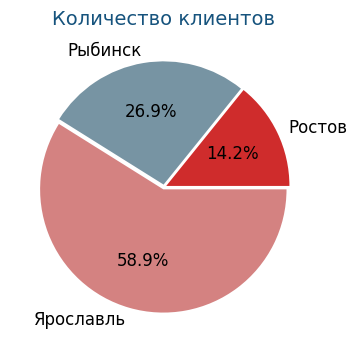

In [34]:
# построим круговую диаграмму по количеству клиентов по городам
bank.groupby('city').city.count().plot.pie(
            figsize=(4,4), ylabel='', colors=color_list,
            autopct='%1.1f%%', explode=[0.02,0.02,0.02], 
            title='Количество клиентов')
plt.title('Количество клиентов', size=14, color=color_list[3])
plt.show();

Учитывая, что население Ярославля сильно превышает население  Рыбинска и тем более Ростова Великого, такое распределение выглядит логично. Если учесть, что население Ярославля (очень приблизительно) более 600 тысяч человек, а в Ростове живёт около 30 тысяч, разница в количестве клиентов по городам могла бы быть ещё больше. 

#### Пол и возраст клиентов

Посмотрим, кто чаще обращается в банк - мужчины или женщины с учётом возраста

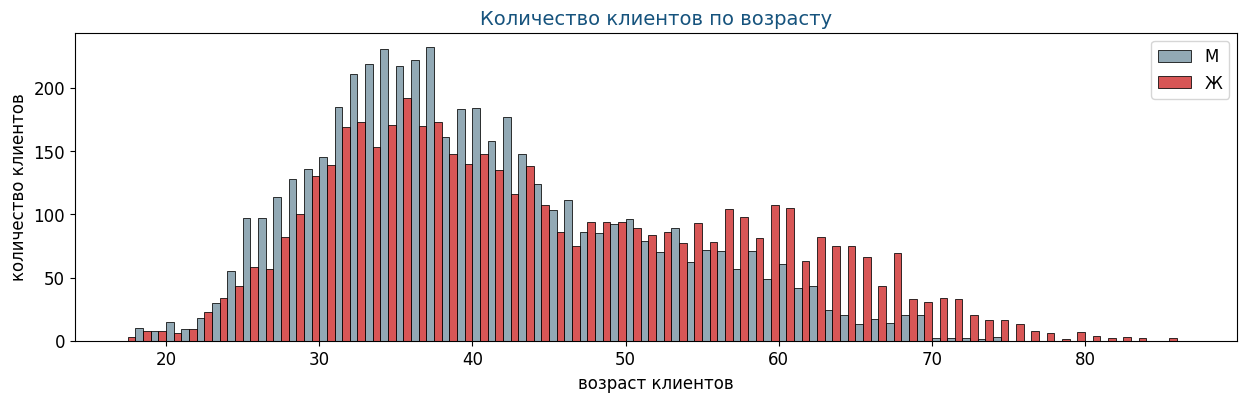

In [35]:
# построим график распределения клиентов разных возрастов
plt.subplots(figsize=(15,4))

sns.histplot(data=bank, x='age', hue='gender', multiple='dodge', 
               palette=color_list[0:2], alpha=.8, discrete=True)

plt.legend(title='', labels=['М', 'Ж'])
plt.xlabel('возраст клиентов', size=12)
plt.ylabel('количество клиентов', size=12)
plt.title('Количество клиентов по возрасту', size=14, color=color_list[3])

plt.show();

Количество клиентов в зависимости от возраста растёт, достигает пика приблизительно для 37-летних клиентов, а затем начинает плавно снижаться. Интересно , что мужчины чаще обращаются в банк в молодом и среднем возрасте. Среди пожилых клиентов больше женщин. Такому графику можно дать объяснение социальными особенностями - различием в уровне доходов и продолжительности жизни мужчин и женщин. А также разницей в уровне жизни молодых и пожилых по сравнению с людьми среднего возраста и т.п.

#### Распределение уровня зарплаты

Посмотрим наличие выбросов в зарплате. Из любопытства опять сравним мужчин и женщин.

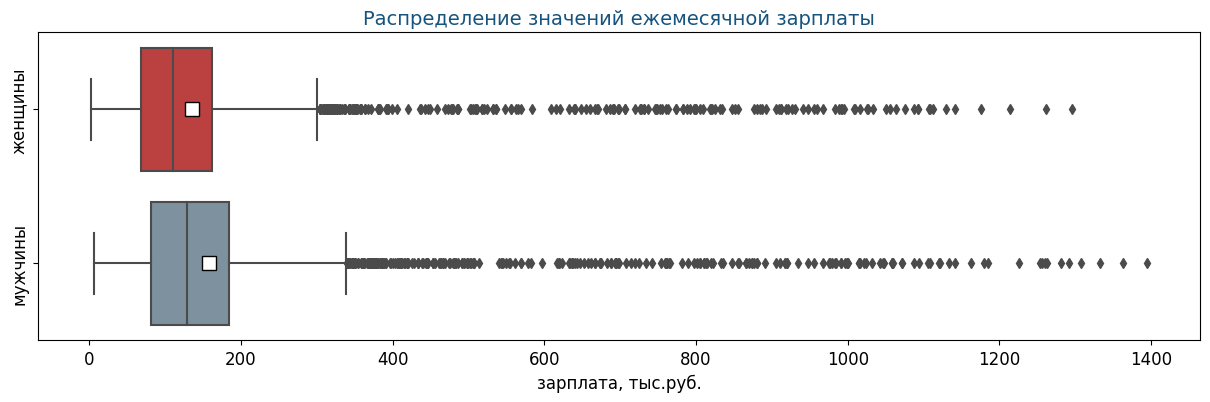

In [36]:
# воспользуемя функцией box_plot
box_plot('salary', 'зарплата, тыс.руб.', 'ежемесячной зарплаты')

Убеждаемся, что мужчины зарабатывают немного больше, чем женщины. 

Что же касается выбросов - они довольно "плотно" расположились после 75-го персентиля. Есть высокие значения, но не сильно превалирующие над остальными: количество клиентов с ростом зарплаты уменьшается довольно плавно. 

#### Оценка собственности

Скорее всего эта величина будет коррелировать с уровнем запрлаты. Посмотрим как распределяется собственность

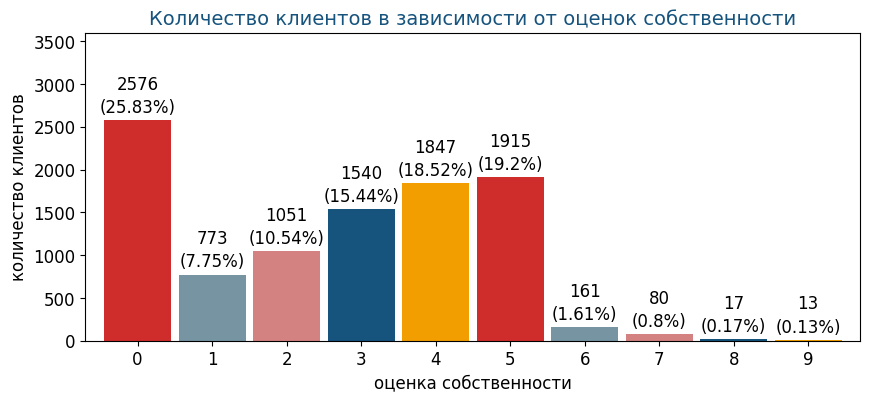

In [37]:
# воспользуемся функцией    
bar_plot('equity', 'оценка собственности', 'оценок собственности')

Четверть из тех, кто попал в нашу базу данных не имеют собственности. Количество владельцев от одного вида собственности до 5 медленно растёт. А потом резко падает и постепенно сокращается. Интересно получилось. Будем считать, что есть какой-то базовый (необходимый для комфортной жизни) набор видов собственности, которого люди пытаются достичь. Ну например: машина, гараж, квартира, дача, ну и плюс что-то ещё одно (не важно что именно). И постепенно (например в зависимости от возраста) большинство достигает этого "набора" и уже либо не стремится к большему, либо просто не имеет возможности приобрести что-то дополнительно.

А вот число тех, кто может себе позволить большее, совсем мало (менее 5%). Предположительно это VIP-клиенты или топ-менеджеры нашего банка :)).

#### Распределение значений кредитного скоринга

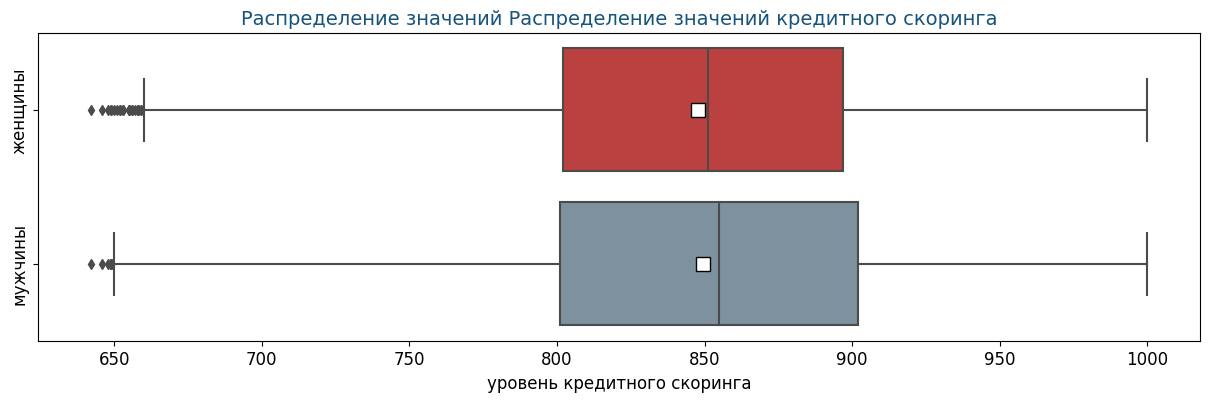

In [38]:
# воспользуемя функцией box_plot
box_plot('score', 'уровень кредитного скоринга', 'Распределение значений кредитного скоринга')

Доверие к заёмщику похоже не зависит от его пола. Выбросов здесь немного, все они для нижних значений скоринга. В выбросы попали наименее надёжные заёмщики. Не очень информативный график.

#### Распределение значений баланса

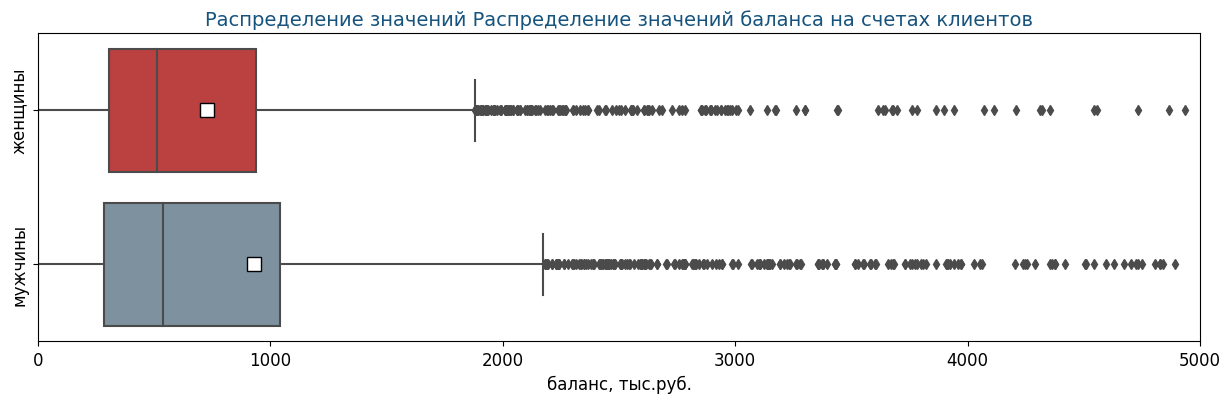

In [39]:
# в следующем комментарии код без маштабирования
# box_plot('balance', 'баланс, 10млн.руб.', 'Распределение значений баланса на счетах клиентов')
box_plot('balance', 'баланс, тыс.руб.', 'Распределение значений баланса на счетах клиентов', 
          x_lim=5000)

В отличие от уровня зарплаты, балансы на счетах клиентов содержат аномально высокие значения, значительно превышающие все остальные. Нужно будет учесть это при дальнейшем анализе. 

#### Распределение количества используемых банковских продуктов

Максимальное количество продуктов, которыми пользуются клиенты равно пяти. Визуализируем это распределение с помощью столбчатой диаграммы.

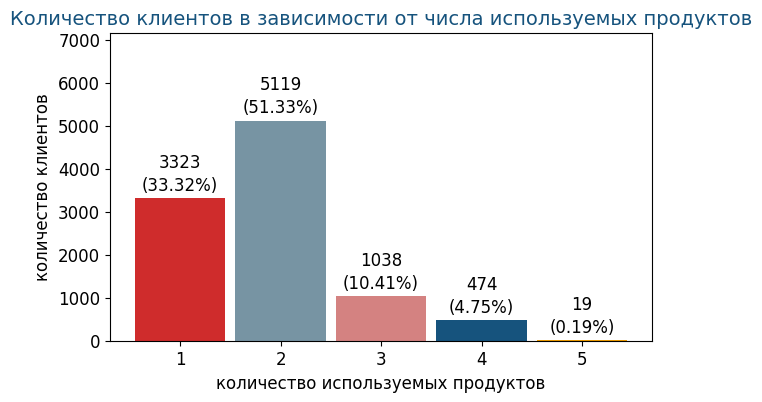

In [40]:
# воспользуемся функцией    
bar_plot('products', 'количество используемых продуктов', 
         'числа используемых продуктов', size=7)

Половина всех клиентов пользуется двумя продуктами, треть - одним. А вот количество тех, у кого 4 или 5 продуктов крайне мало. В сумме таких клиентов не более 5%.

#### Определение выбросов

Рассчитаем персентили для определения выбросов по значениям баланса и зарплаты.

In [41]:
bank[['salary', 'balance']].quantile([.94, .95, .96, .97, .98, .99]).astype(int)

,salary,balance
0.94,291,1912
0.95,316,2114
0.96,353,2418
0.97,452,2818
0.98,664,3438
0.99,885,4827


Квантили рассчитаны по значениям каждого столбца в отдельности. Кроме того, группы клиентов, у которых высокая зарплата и большие счета пересекаются. Попробуем посчитать какой процент от всех записей составят те, где указана зарплата свыше 500 тыс.руб. или на счету лежит более 3 млн.руб. Это приблизительно по 2.5% значений в этих полях.

In [42]:
val_tmp = len(bank.query('salary>500 | balance>3000'))/len(bank)
print(f'Доля клиентов с зарплатой выше 500т.р. или балансом выше 3млн.р.: \033[1m{val_tmp:0.2%}\033[0m')

Доля клиентов с зарплатой выше 500т.р. или балансом выше 3млн.р.: 4.07%


Опять же не будем спешить исключать эти данные из таблицы. Многие методы анализа "терпимы" к выбросам. Сохраним условие для выбора данных без выбросов в текстовой переменной, чтобы воспользоваться если понадобится. Заодно запомним значения 95-го персентиля для уровня доходов и баланса отдельно, чтобы можно было исключить 5% данных при анализе этих столбцов по отдельности. 

In [43]:
outl = 'salary<=500 & (balance<=3000 | balance.isna())'
outl_sal = int(bank.salary.quantile(.95))
outl_bal = int(bank.balance.quantile(.95))

### Изучение целевого параметра

Построим нормализованные (плотностные) гистограммы, чтобы сравнить в пределах одного параметра группы клиентов которые ушли и которые остались. 

####  Отток клиентов разных категорий
Изучим как влияет город проживания, возраст и пол клиентов на желание уйти из нашего банка.

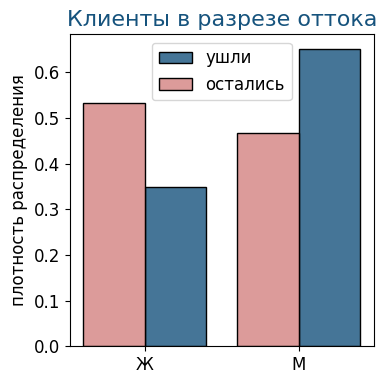

In [44]:
churn_hist('gender', '', 'Клиенты', leg_loc='upper center')    

Учитывая, что у нас число мужчин и женщин практически одинаковое, отток мужской части клиентов настораживает. Сложно предположить в чём может быть причина. 
- мужчины больше любят технические усовершенствования. В данном случае их может привлечь наличие удобных приложений у банка-конкурента;
- в отделениях банка мало красивых операционисток;
- женщины просто не любят менять то, к чему привыкли, а мужчины активнее следят за любыми изменениями на рынке, готовы на перемены.

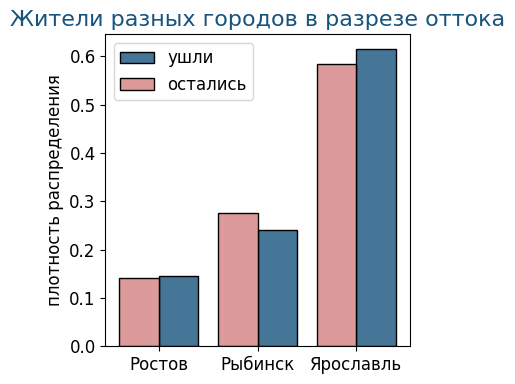

In [46]:
churn_hist('city', '', 'Жители разных городов', leg_loc='upper left')    

Похоже, что от того, в каком городе живёт клиент, отток почти не зависит. Совсем незначительно доля ушедших выше в Ярославле, а лучше всего - ситуация в Рыбинске.

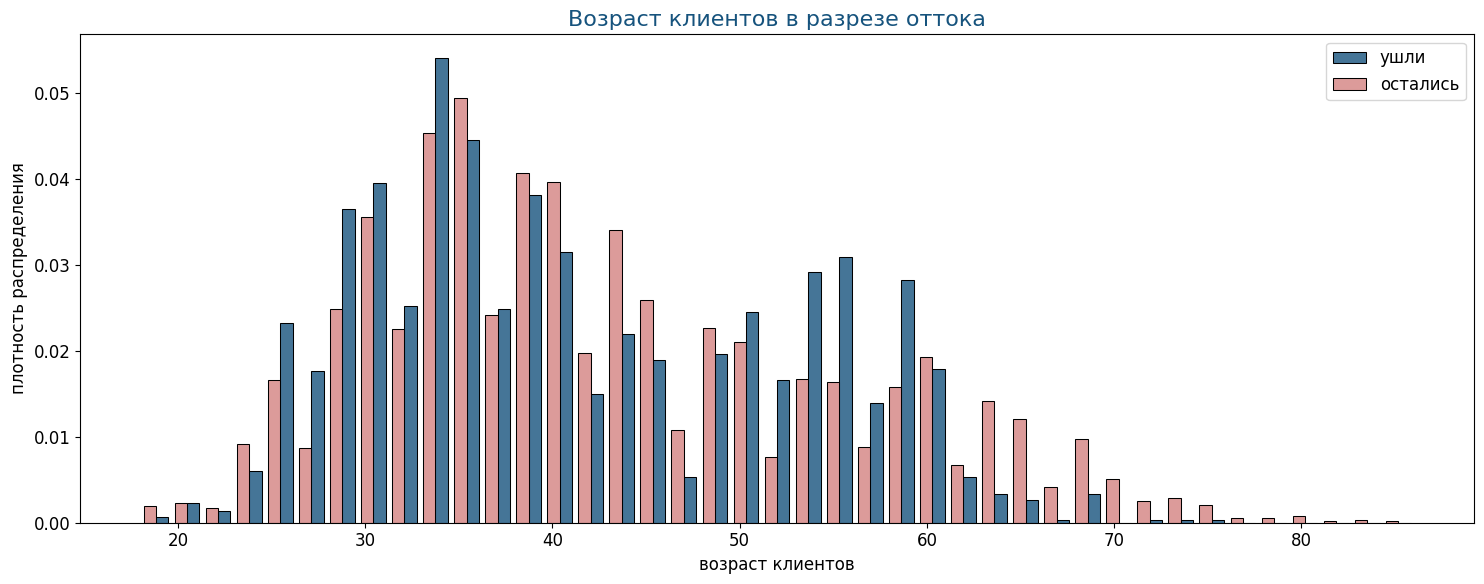

In [47]:
churn_hist('age', 'возраст клиентов', 'Возраст клиентов')    

Видим, что "пиковые" значения оттока, когда число ушедших выше среднего наблюдаются для двух групп клиентов по возрасту. Уточним эти два интервала, рассчитав долю ушедших среди людей одного возраста и сравнив её со средним значением оттока по всей таблице. 

In [48]:
df_tmp = bank.groupby('age').churn.mean().to_frame() > bank.churn.mean()
df_tmp = df_tmp.reset_index()
display(df_tmp.query('age>22 & age<40').set_index('age').T)
display(df_tmp.query('age>46 & age<64').set_index('age').T)

age,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
churn,False,False,True,True,True,True,True,True,True,True,True,True,True,False,True,True,False


age,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
churn,False,False,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False


Видим, что "пиковые" значения оттока, когда число ушедших выше среднего, наблюдаются для тех, кому от 25 до 35 лет и в возрасте от 50 до 60 включительно. Наиболее "стабильные" клиенты имеют возраст от 36 до 49 лет. 
Можно только догадываться о причинах. Например причины напрямую зависящие от возраста и социальных изменениий в жизни в этом возрасте:
- клиент брал кредит перед свадьбой, постепенно расплатился, необходимость в услугах нашего банка отпала и он ушел;
- для большинства значительные изменения в жизни происходят именно до 35 лет - появление семьи и детей и связанные с этим расходы; 
- также и при выходе на пенсию или в предпенсионном возрасте - самостоятельность детей (т.е. меняется состав семьи), появляются новые связанные с этим жилищные и т.п. проблемы. 

Возможны также причины, косвенно зависящие от возраста. Например когда наш банк не может предоставить какие-либо услуги клиентам, необходимые в основном именно в указанном возрасте и поэтому клиенты уходят:
- ну, скажем, какие-то сложности с оформлением пенсионных выплат через наш банк. Пенсионеру проще иметь дело только с одним банком, а не с несколькими, поэтому он выбирает более подходящий, а наш банк покидает;
- аналогично для тех, кто в первой половине жизни - не устроили наши кредитные условия и клиент ушёл в другой банк.

#### Отток клиентов в зависимости от доходов

Вспомним, что мы решили  принмать за выбросы те случаи, когда зарплата превышает 500 тыс.руб. Исключим на графике.

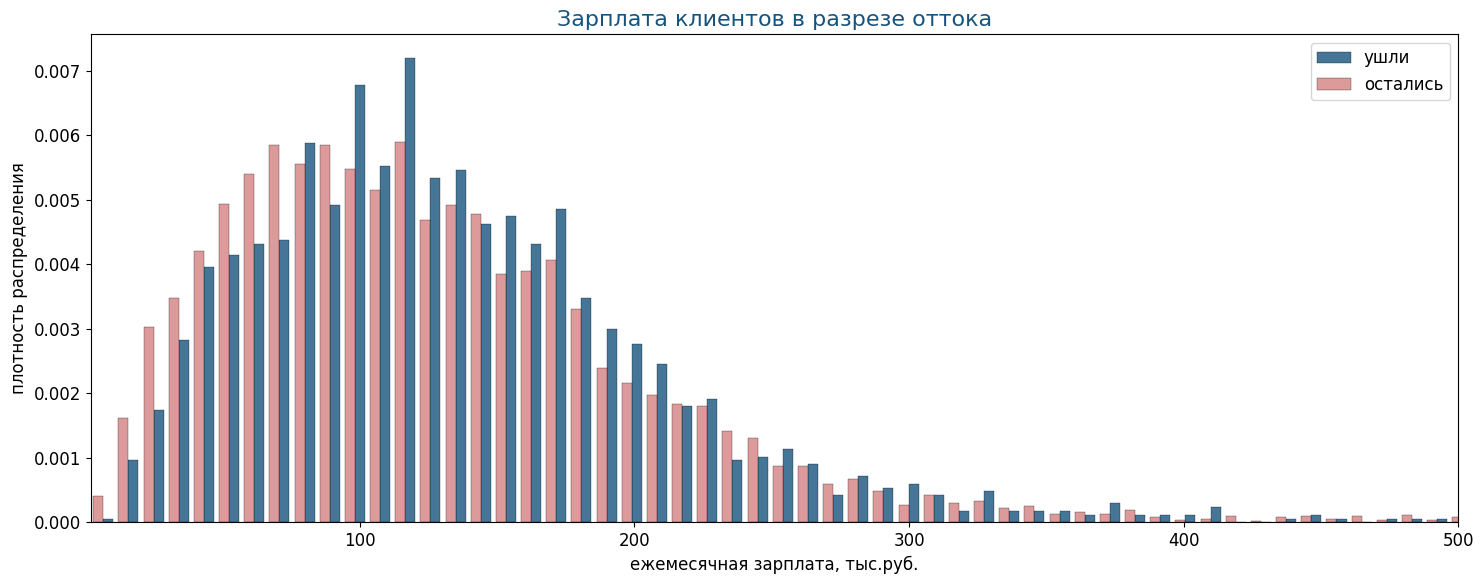

In [49]:
churn_hist('salary', 'ежемесячная зарплата, тыс.руб.', 'Зарплата клиентов', x_lim=500)    

- Клиенты, зарплата которых не превышает 80 тыс.руб. почти не покидают банк. 
- Люди с ежемесячным доходом от 100 до 220 тыс. рублей, которых судя по боксплоту, в наших данных немало, уходят чаще остальных. 
- У тех, у кого зарплата ещё выше, строгой зависимости нет, доли оттока более стабильны.

Таким образом, наиболее "доходная" часть клиентов почему-то уходит чаще. Тревожный фактор, который нужно будет ещё проверить. Причины по сути могут быть те же, какие мы предположили для клиентов определенных возрастных групп. Например: 
- недавно закончившие ВУЗ и имеющие невысокие зарлаты не покидают банк, т.к. имеют кредитные обязательства; 
- уже "вставшие на ноги" со стабильным доходом, вернувшие кредиты, перестают нуждаться в услугах нашего банка и т.д.

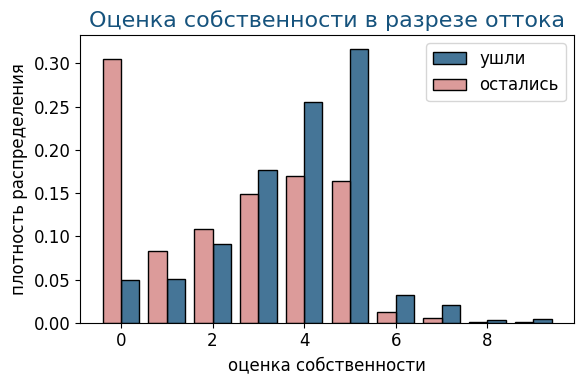

In [50]:
churn_hist('equity', 'оценка собственности', 'Оценка собственности')        

Если предположить, что оценка собственности коррелирует с уровнем зарплаты, этот график подтверждает предыдущий. Чем "богаче" клиенты, тем больше уровень оттока.

#### Отток клиентов в зависимости от кредитной истории

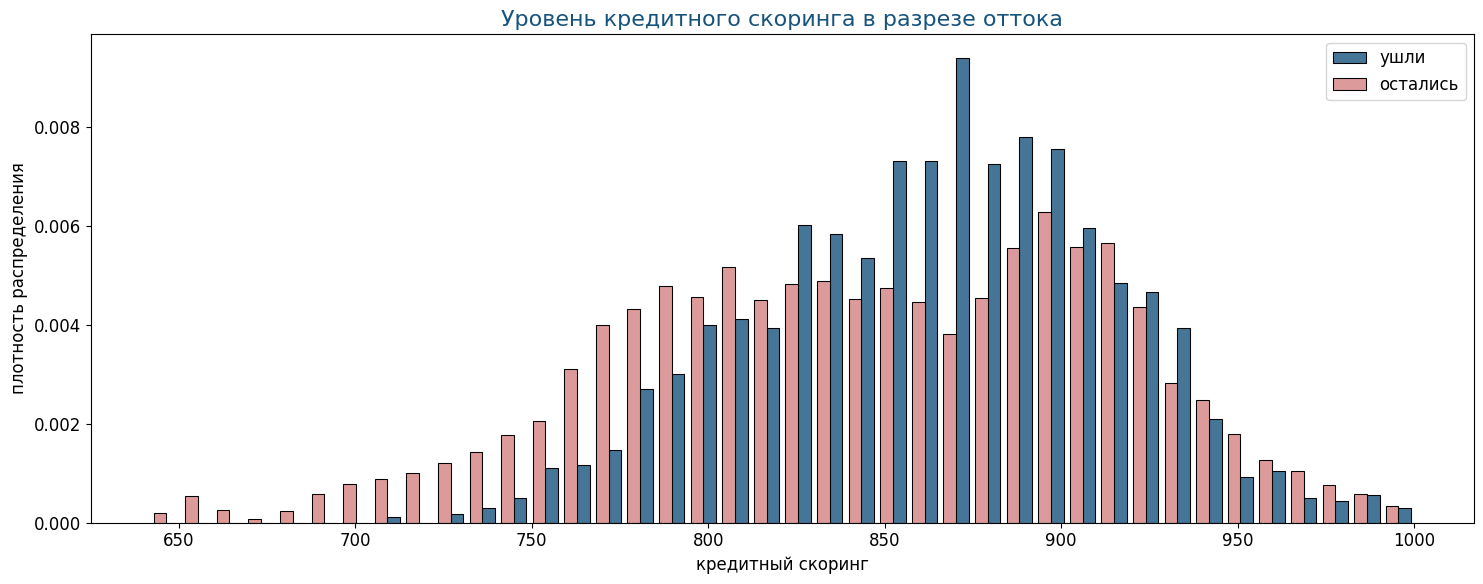

In [51]:
churn_hist('score', 'кредитный скоринг', 'Уровень кредитного скоринга')    

И опять похожая картина. Наибольший процент оттока среди самой многочисленной группы клиентов - обладателей среднего уровня скоринга приблизительно от 830 до 940. 

Так же как мы делали для возраста немного повозившись уточним отточные интервалы.

In [52]:
%%capture --no-display
df_tmp = bank[['churn', 'score']]
# выделим значение десятков из скоринга
df_tmp['score'] = (df_tmp.score/10).astype(int)
df_tmp = df_tmp.groupby('score').churn.mean().to_frame() > bank.churn.mean()
df_tmp = df_tmp.reset_index()
display(df_tmp.query('score>80 & score<95').set_index('score').T)

df_tmp = bank.query('score>810 & score<820').groupby('score').churn.mean().to_frame() > bank.churn.mean()
df_tmp = df_tmp.reset_index()
display(df_tmp.set_index('score').T)

df_tmp = bank.query('score>930 & score<940').groupby('score').churn.mean().to_frame() > bank.churn.mean()
df_tmp = df_tmp.reset_index()
display(df_tmp.set_index('score').T)

score,81,82,83,84,85,86,87,88,89,90,91,92,93,94
churn,False,True,True,True,True,True,True,True,True,True,False,True,True,False


score,811,812,813,814,815,816,817,818,819
churn,False,False,True,False,False,True,True,False,False


score,931,932,933,934,935,936,937,938,939
churn,True,False,True,True,False,True,True,False,False


Будем считать, что наибольший отток есть для значения кредитного скоринга от 816 до 937. 

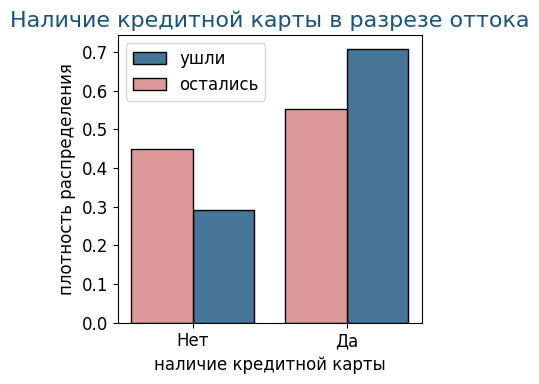

In [53]:
churn_hist('card', 'наличие кредитной карты', 'Наличие кредитной карты')

Отчасти и этот график подверждает сделанные выше догадки. Клиенты, которые пользовались кредитными услугами, имеют более высокий уровень оттока. Значит, в кредитах больше не нуждаются или нашли более выгодные условия у конкурентов.

#### Отток клиентов в зависимости от используемых услуг банка

Сначала изучим влияние суммы счёта на отток клиентов. На графике исключим выбросы (значения баланса свыше 3 млн.руб.)

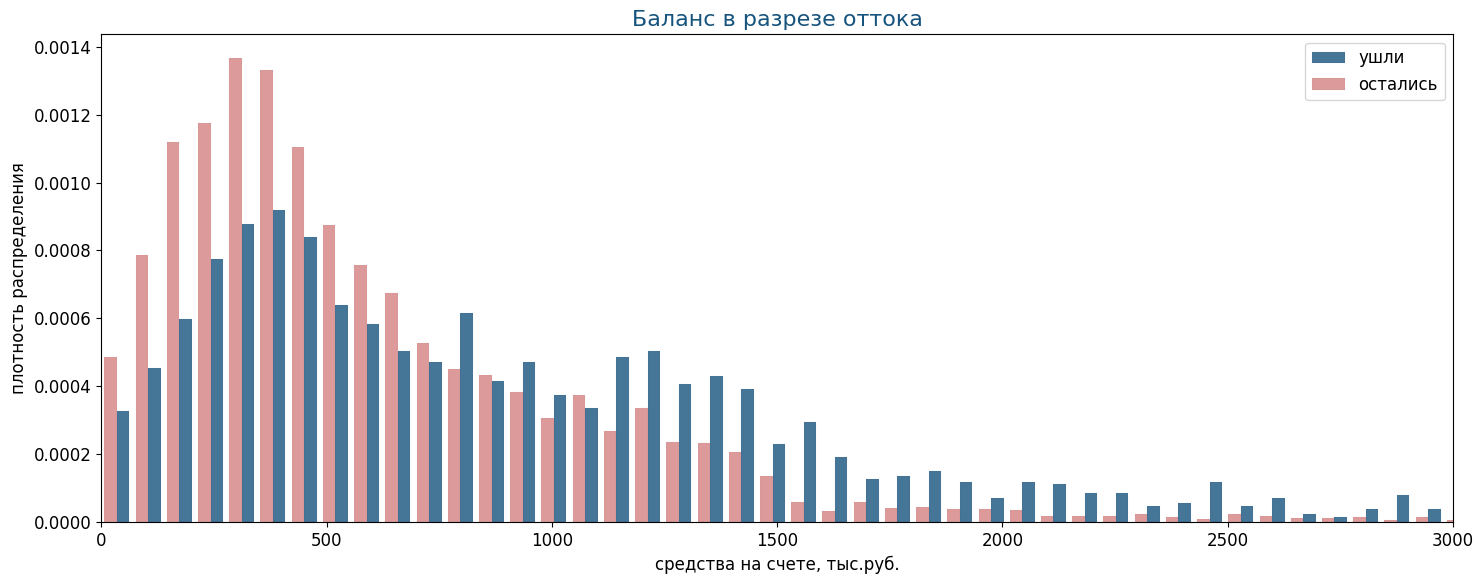

In [54]:
churn_hist('balance', 'средства на счете, тыс.руб.', 'Баланс', x_lim=3000)    

Чем богаче клиенты, тем выше уровень оттока. "Проблема" начинается приблизительно после 800 тыс.руб. на балансе. Поначалу доля ушедших клиентов слегка колеблется, что может быть случайными флуктуациями. А для владельцев счетов выше 1 мнл. 100 тыс.руб. доля оттока всегда выше. 

Так как наличие таких счетов является признаком большого дохода, то и причины оттока для этой группы клиентов могут быть теми же, как в случае с уровнем зарплаты. Кроме того, есть на удивление две диаметрально противоположные причины, которые могли бы привести к нашей ситуации:
- *в нашем банке низкий процент капитализации вкладов или счетов*: клиентов с большими суммами накоплений это не устраивает и они переходят в другие банки;
- *в нашем банке высокий процент капитализации вкладов*: клиенты используют наш банк для целевых накоплений. Хранят средства, получают проценты, а при достижении необходимой суммы совершают покупку. После чего необходимость в подобных услугах сама собой пропадает.

Что скажут люди, не имеющие средств на счетах?:

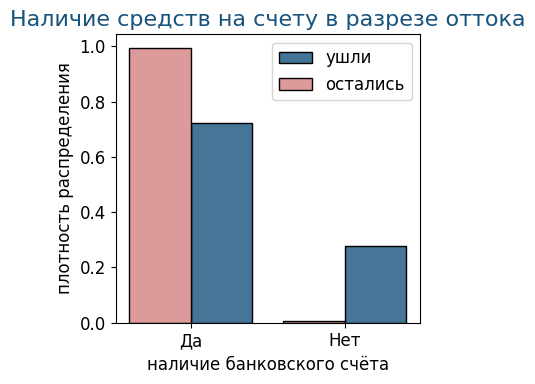

In [55]:
churn_hist('account', 'наличие банковского счёта', 'Наличие средств на счету')   

Логично - зачем нужен банк, если не хранить в нём свои собственные сбережения. 

Есть и другое объяснение. Пропуски в значениях баланса могли образоваться следующим образом: клиент решил уйти по другой причине, закрыл счёт, но окончательно перестал пользоваться остальными услугами позже. Поэтому на момент "ухода" из банка, у клиента были закрыты все счета. Это определяет почему настолько "сильная" зависимость оттока от отсутствия значений баланса.

Осталось посмотреть как количество продуктов может влиять на отток.

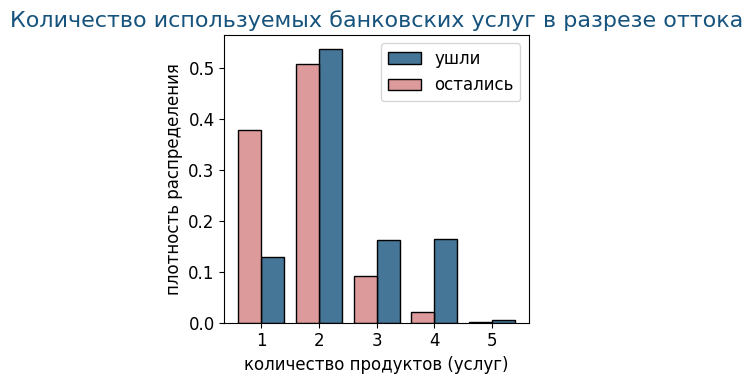

In [56]:
churn_hist('products', 'количество продуктов (услуг)', 'Количество используемых банковских услуг')   

- Неужели, что чем большим количеством услуг пользуются клиенты, тем сильнее они недовольны этими услугами? 
- Или всё же версия с *высоким процентом капитализации* верна? Клиент, заводит счёт, берёт кредит, устанавливает приложение или заводит депозитаную ячейку (это уже 3-4 услуги), а когда достигает намеченного - совершает покупку или расплачивается с кредитом, то уходит.

#### Влияние активности клиента на желание уйти

Остался последний параметр:

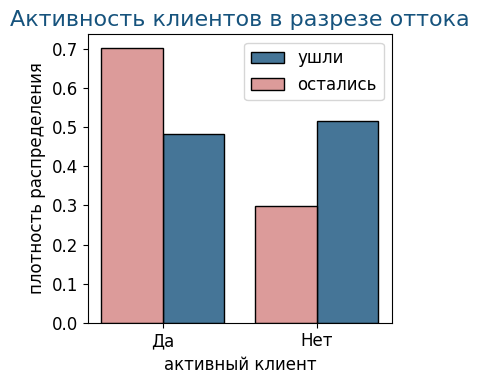

In [57]:
churn_hist('activity', 'активный клиент', 'Активность клиентов') 

Выше мы выяснили, что количество активных и пассивных клиентов почти одинаково. Здесь же мы видим другую картину. Ситуация объяснима по логическим соображениям. Клиенты, которые услугами банка долгое время не пользуются, в конце концов уходят, увеличивая тем самым долю оттока на этом графике справа.

### Портреты клиентов

На основе выводов, полученных выше, нарисуем портреты двух среднестатистических клиентов. Один из них ушел из банка, другой остался. 

#### Портрет клиента оттока

Чтобы проще было вспомнить результаты сравнений выведем медианы и средние значения количественных параметров для таких клиентов, а также названия тех категориальных параметров, которых было больше

In [58]:
# категории
display(bank.query('churn').describe(include='category').T['top'].to_frame().T)
# количественные и логические параметры
display(bank.query('churn').select_dtypes(exclude='category')
        .apply(['mean', 'median']).astype(int))

,city,gender
top,Ярославль,М


,churn,age,salary,equity,card,score,balance,account,products,activity
mean,1,41,147,3,0,863,1134,0,2,0
median,1,39,125,4,1,866,783,1,2,1


<div id='churn_client' style="border:solid navy 2px; padding: 20px"> 
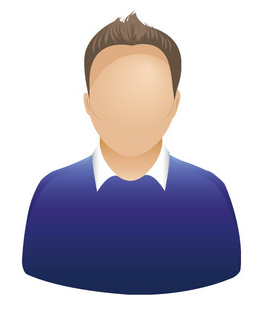  
<b style="color:navy">Портрет ушедшего клиента</b>

<i style="color:navy">Мужчина</i> из 
<i style="color:navy">Ярославля</i>, около 
<i style="color:navy">40</i> лет, со 
<i style="color:navy">средним уровнем дохода</i>
<i style="color:navy">130-140 тыс.руб.</i> 

У него есть <i style="color:navy">кредитная карта</i>, 
а значение кредитного скоринга чуть выше, чем <i style="color:navy">860</i>. 
Если у такого клиента был открыт счёт, то на нём хранилось приблизительно 
<i style="color:navy">900 тыс.руб.</i> "на черный день" и до ухода он продолжал пользоваться 
<i style="color:navy">двумя услугами</i> нашего банка (видимо кредитной картой и счётом). 

</div>

#### Портрет лояльного клиента

Также выведем значения

In [59]:
# категории
display(bank.query('~churn').describe(include='category').T['top'].to_frame().T)
# количественные и логические параметры
display(bank.query('~churn').select_dtypes(exclude='category')
        .apply(['mean', 'median']).astype(int))

,city,gender
top,Ярославль,Ж


,churn,age,salary,equity,card,score,balance,account,products,activity
mean,0,43,147,2,0,845,733,0,1,0
median,0,40,118,3,1,848,475,1,2,0


<div id='not_churn_client' style="border:solid firebrick 2px; padding: 20px"> 
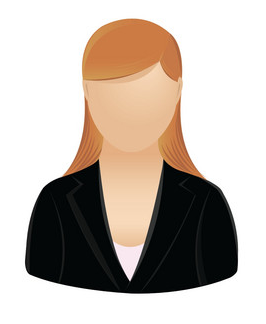 
<b style="color:firebrick">Портрет оставшегося клиента</b>
    
Приятная <i style="color:firebrick">женщина</i> из 
<i style="color:firebrick">Ярославля лет сорока</i>, получающая зарплату 
<i style="color:firebrick">130 тыс.руб.</i> со 
<i style="color:firebrick">средним уровнем дохода</i>. 
    
У неё нет <i style="color:firebrick">кредитной карты</i> нашего банка 
и далеко не самый высокий уровень кредитного скоринга около 
<i style="color:firebrick">850</i>. 
Точно неизвестно сколько осталось на ёё счету, предположим, что 
<i style="color:firebrick">700 тыс.руб.</i> Своими
<i style="color:firebrick">двумя банковскими продуктами</i> она не пользуется, так как её аккаунт 
<i style="color:firebrick">не активен</i>. 
    
</div>

Портрет лояльного клиента получился не лояльным. А если серьезно, то наиболее сильное различие между этими двумя портретами - пол клиента, и в меньше степени - баланс. Поэтому в данном случае без сегментации не обойтись. 

### Корреляционный анализ

#### Коэффициент корреляции $\phi k$

Чтобы проанализировать зависимость оттока от всех остальных параметров, используем коэффициент корреляции $\phi k$, поскольку 
- в отличие от коэффициента корреляции Пирсона, он ищет зависимости также и от категориальных признаков;
- в отличие от коэффициента Крамера, не так чувствителен к выбросам;
- не учитывает пропущенные значения.

Для применения этого коэффициента используем библиотеку `phik`. В процессе нам понадобится список всех количественных полей, чтобы методы могли отделить их от категориальных и логических признаков. Зададим такой список

In [60]:
num_col = ['age', 'salary', 'score', 'balance']

#### Матрица корреляции 

Чтобы проанализировать зависимость оттока от всех остальных параметров, используем коэффициент корреляции $\phi k$, поскольку 
- в отличие от коэффициента корреляции Пирсона, он ищет зависимости также и от категориальных признаков;
- в отличие от коэффициента Крамера, не так чувствителен к выбросам;
- не учитывает пропущенные значения.

Построим матрицу корреляции.

In [61]:
df_tmp = bank.phik_matrix(interval_cols = num_col).fillna(1)

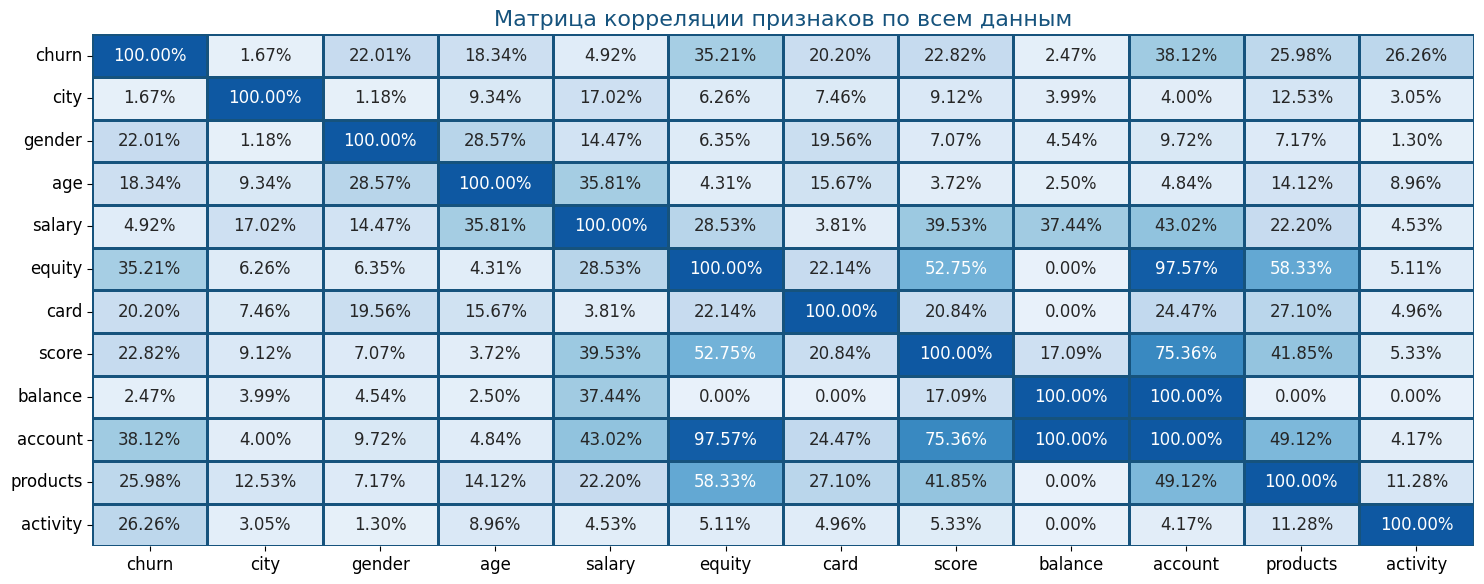

In [62]:
plt.subplots(figsize=(15,6))
sns.heatmap(df_tmp, annot=True, fmt='.2%', 
            cmap='Blues', cbar=False, vmin=-.1, vmax=1.2,
            linecolor=color_list[3], linewidth=2)

plt.title('Матрица корреляции признаков по всем данным', size=16, color=color_list[3])
plt.tight_layout()
plt.show();

Конечно, нас интересует только один столбец оттока. Сохраним его отдельно. Но по всей матрице мы можем отследить другие особенности наших данных и получить из этого полезную информацию. Например: 
- влияние на отток параметров, которые **взаимно коррелируют** друг с другом не следует анализировать одновременно, так же как и делить на сегменты клиентов по таким парам признаков;

- отметим, что **активность** оказывает влияние на единственный параметр - на отток клиентов, хотя эта зависимость не сильная (коэффициент корреляции всего 0.26);

- низкие значения коэффициентов корреляции **баланса** со всеми остальными признаками могут быть по причине выбросов, проверим это ниже.

In [63]:
# выделим столбец оттока из матрицы по всем данным
churn_corr = df_tmp.churn.drop('churn', errors='ignore').to_frame()
churn_corr.columns = ['raw_data']

#### Взаимно коррелирующие параметры

Почти полная зависимость **оценки собственности** от наличия **счёта** (по всем данным) говорит исключительно о том, что банк рассчитал эту оценку по информации о балансе на счету клиентов. Обратим также внимание на то, что коэффициенты корреляции в этиих двух полях похожи. Чтобы в этом убедиться, проверим какие значения принимает `equity` в записях с отсутствующим балансом. 

In [65]:
display(bank.query('balance.isna()').equity.value_counts().to_frame().T)

equity,0,1
count,2164,114


Получается, что в таблице много **косвенно зависящих** друг от друга параметров:
- количество используемых продуктов зависит от состоятельности (оценки собственности),
- как мы убедились выше, оценка собственности может зависеть от наличия информации о балансе, 
- баланс зависит от зарплаты, 
- а уровень кредитного скоринга рассчитывается наверняка с учётом доходов и средств на счетах.

При сегментации деление клиентов на группы по парам значений из списка: `products`, `equity`, `balance`, `account`, `salary` и `score` будем иметь ввиду, что это взаимно коррелирующие значения.

#### Матрица корреляции по очищенным данным

Посмотрим как поменяется взаимное влияние признаков, если мы удалим выбросы по значениям дохода и баланса.

In [66]:
df_tmp = bank.query(outl).phik_matrix(interval_cols = num_col).fillna(1)

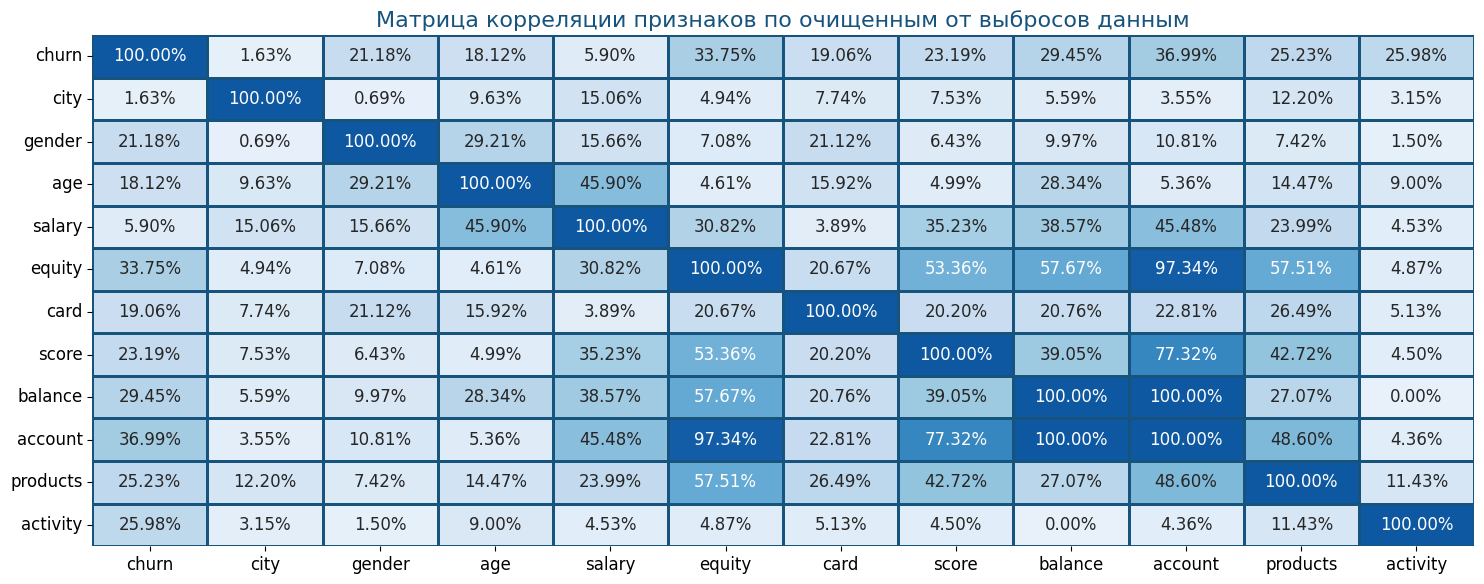

In [67]:
# нарисуем тепловую карту по матрице
plt.subplots(figsize=(15,6))
sns.heatmap(df_tmp, annot=True, fmt='.2%', 
            cmap='Blues', cbar=False, vmin=-.1, vmax=1.2,
            linecolor=color_list[3], linewidth=2)

plt.title('Матрица корреляции признаков по очищенным от выбросов данным', size=16, color=color_list[3])
plt.tight_layout()
plt.show();

Видим интересные изменения. Оказывается, наличие счёта сильно связано сразу со всеми параметрами, кроме относящихся непосредственно к личным данным о клиенте. При этом абсолютно неважно сколько средств на счету.

Коэффициенты корреляции для оттока также значительно поменялись. Теперь мы видим, что отток всё же с вероятностью в почти 30% зависит от баланса. 

#### Столбец корреляции оттока

Добавим к сохранённому выше столбцу корреляции такой же по очищенным данным. Построим по ним тепловую карту.

In [68]:
churn_corr['clean_data'] = df_tmp.churn.drop('churn', errors='ignore').to_frame()

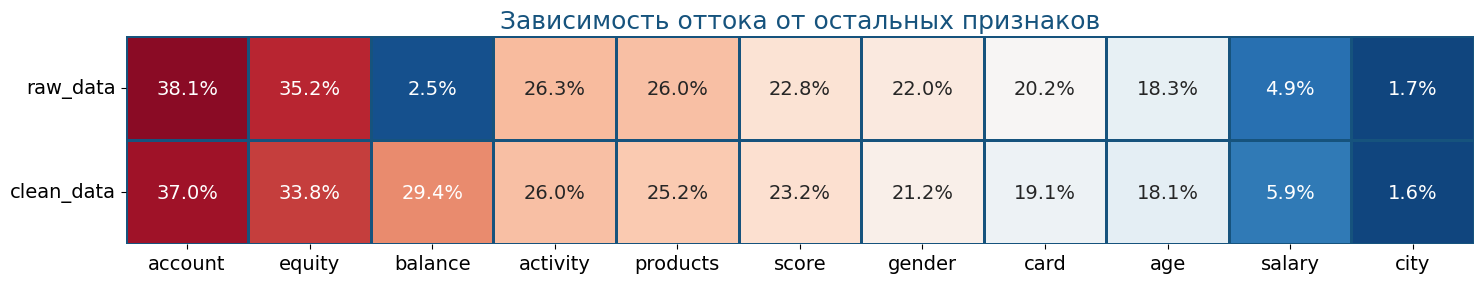

In [69]:
# построим тепловую карту
plt.subplots(figsize=(15,3))
sns.heatmap(churn_corr.sort_values(by='clean_data', ascending=False).T, 
            annot=True, fmt='.1%', 
            cmap='RdBu_r', vmin=0, vmax=.4, cbar=False,
            linecolor=color_list[3], linewidth=2, annot_kws={'size': 14})

plt.title('Зависимость оттока от остальных признаков', size=18, color=color_list[3])
plt.xticks(rotation=0, size=14)
plt.yticks(rotation=0, size=14)
plt.tight_layout()
plt.show();

Сравним две строки коэффициентов корреляции оттока. Видим только одну существенную разницу для столбца `balance`. С такими большими выбросами, какие наблюдались в наших данных, метод $\phi k$ не справился. 
К сожалению этот метод ещё и не позволяет определить "направление" зависимости. Можем только предполагать опираясь на гистограммы. Разделим признаки на три группы по цвету :)). Проанализируем их с учётом построенных выше нормализованных гистограмм в следующем пункте.

Было замечено, что почти все клиенты, у которых не была указана сумма баланса на счетах (пропущены значения) ушли из банка. Так как мы не знаем точно причину появления пропусков и видим, что отсутствию счёта соответствуют нулевые значения в поле equity, не будем учитывать созданный нами столбец `account` при анализе коэффициентов корреляции.

### Итоги исследовательского анализа

В ходе исследования были созданы среднестатистические портреты <a href="#churn_client">клиента оттока </a> и <a href="#not_ churn_client">лояльного клиента</a>. 

По значениям коэффициентов корреляции параметры можно условно разбить на три группы:

1. <b id='param'>Параметры, влияющие на отток наибольшим образом</b>.
    - Оценка собственности `equiity` и сумма средств на счету клиента `balance`: зависимость от этих показателей невыгодна для банка - чем состоятельнее клиенты, тем выше процент оттока. Эти два параметра сильно (с вероятностью 57.5%) коррелируют между собой - оценку собственности явно рассчитывали по информации о состоянии счёта.
    - Активность клиента `activity`: здесь всё логично - если клиент давно не пользуется нашими услугами, то со временем и вовсе от них отказывается.

    - Количество продуктов `products`  и уровень кредитного скоринга `score`: довольно сильно коррелируют как с оценкой собственности, так и между собой. Жаль, но клиенты, пользующиеся всего одной услугой, а также ненадёжные заёмщики чаще чем остальные остаются в нашем банке.

2. **Параметры со средним уровнем корреляции с оттоком**.
    
    - `gender`: мужчины гораздо чаще чем женщины покидают банк;
    - `card`: доля оттока среди владельцев кредитной карты выше, чем среди тех, у кого её нет;
    - `age`: влияние возраста на отток было заметно на гистограмме. Зависимость нелинейная, можно это проверить на отдельных возрастных категориях. 

3. **Параметры, влияние которых на отток клиентов не подтвердилось**:
    
    - `salary`: несмотря на низкий уровень коэффициентов корреляции, на гистограмме видно, что выше всего отток у клиентов со средней зарплатой, одновременно уровень зарплаты довольно сильно коррелирует с суммой баланса; 
    - `city`: отток клиентов с высокой вероятностью не зависит от города проживания.

<h2 style="color:navy">Проверка гипотез</h2>

### Выбор гипотез и методов их проверки

Перед тем как сегментировать клиентов, определим насколько правильно мы нашли группы оттока клиентов. 
Опишем какие именно зависимости мы хотим проверить. А затем сформулируем и проверим отдельно каждую гипотезу.

1. Менеджеры нашего банка очень хотели узнать влияет ли доход на отток клиентов. Поэтому в первую очередь проверим насколько вероятно такое предположение: <font style="color:navy">«Есть статистически значимые различия в среднем значении дохода между теми клиентами, которые ушли и теми, которые остались»</font>.


2. Похоже, что отток клиентов тем выше, чем больше значение баланса. Проверим следующее предположение: <font style="color:navy">«Есть статистически значимая разница между средней суммой баланса на счетах ушедших клиентов и тех, кто остался»</font>.
    

3. Мы заметили, что отток среди мужчин выше, чем среди женщин. Проверим насколько мы правы: <font style="color:navy">«Есть статистически значимое отличие между долей мужчин среди клиентов, которые ушли и долей мужчин среди клиентов, которые остались»</font>.


4. Пока не совсем ясно насколько сильно отток клиентов зависит от наличия кредитной карты. Убедимся в том, что клиенты, имеющие кредитную карту уходят чаще: <font style="color:navy">«Есть статистически значимое отличие между долями клиентов имеющих кредитную карту среди клиентов оттока и среди клиентов, которые остались»</font>. Сложно сформулировано, надеюсь, смысл понятен.

Теперь определимся с выборками и методом проверки:
- для проверки гипотез используем весь датасет, разделив его на две **выборки** в первых трёх случаях - по значению оттока, а для четвёртой гипотезы - по возрасту;
- для **сравнения средних** используем t-критерий Уэлча; 
- для **сравнения долей** рассчитаем статистическую значимость c помощью непараметрического теста Манна-Уитни, который даёт хорошие результаты при наличии выбросов. 

### Гипотеза о различиях в доходах

<font style="color:navy">«Есть статистически значимые различия в среднем значении дохода между теми клиентами, которые ушли и теми, которые остались»</font>

Сформулируем нулевую и альтернативную гипотезы и зададим уровень статистической значимости:
- $Н_0= $ «Среднее значение ежемесячных доходов клиентов оттока равно среднему значению доходов оставшихся»
- $Н_1= $ «Средние значения доходов клиентов оттока и оставшихся клиентов разное»
- $\alpha = 0.05$

Сначала протестируем работу функции проверки гипотез на сырых данных. При наличии выбросов средние значения скорее всего будут совпадать с большей вероятностью. Убедимся, что функция работает корректно. 

In [70]:
hyp(bank.query('churn').salary, 
    bank.query('~churn').salary,
    'Среднее значение ежемесячных доходов клиентов оттока равно среднему значению доходов оставшихся', 
    'Средние значения доходов клиентов оттока и оставшихся клиентов разное')

p-value = 0.831785

Выводы:
- Не получилось отвергнуть нулевую гипотезу.
- Среднее значение ежемесячных доходов клиентов оттока равно среднему значению доходов оставшихся
  с вероятностью 41.59%
- Cредние значения первой группы отличаются на 0.47% от средних значений второй группы


Этого мы и ожидали, теперь очистим значения от выбросов, используя сохранённое значение 95-го персентиля. 

In [71]:
hyp(bank.query('churn & salary<=@outl_sal').salary, 
    bank.query('~churn & salary<=@outl_sal').salary,
    'Среднее значение ежемесячных доходов клиентов оттока равно среднему значению доходов оставшихся', 
    'Средние значения доходов клиентов оттока и оставшихся клиентов разное')

p-value = 0.000077

Выводы:
- Отвергаем нулевую гипотезу. Разница значений статистически значима.
- Средние значения доходов клиентов оттока и оставшихся клиентов разное
  с вероятностью 100.00%
- Cредние значения первой группы отличаются на 5.45% от средних значений второй группы


Предположение от менеджеров оказалось верным на все 100%. Судя по последней строке выводов - уровень дохода клиентов оттока выше, чем у тех, кто остался. В обратном случае значение разницы было бы отрицательным. Что касается матрицы корреляции - видимо просто не была найдена какая-то явная зависимость. Поэтому получились низкие значения коэффициентов корреляции суммы дохода и значений оттока. И всё же разница в средних значениях не очень большая - они отличаются всего лишь на 5%.

### Гипотеза о различиях в балансе

<font style="color:navy">«Есть статистически значимая разница между средней суммой баланса на счетах ушедших клиентов и тех, кто остался»</font>.

Сформулируем нулевую и альтернативную гипотезы и зададим уровень статистической значимости:
- $Н_0= $ «Среднее значение баланса клиентов оттока равно среднему значению доходов оставшихся»
- $Н_1= $ «Средние значения баланса клиентов оттока и оставшихся клиентов разное»
- $\alpha = 0.05$

Удалим выбросы и проведём t-тест.

In [72]:
hyp(bank.query('churn & balance<=@outl_bal').balance, 
    bank.query('~churn & balance<=@outl_bal').balance,
    'Среднее значение баланса клиентов оттока равно среднему значению доходов оставшихся', 
    'Средние значения баланса клиентов оттока и оставшихся клиентов разное')

p-value = 0.000000

Выводы:
- Отвергаем нулевую гипотезу. Разница значений статистически значима.
- Средние значения баланса клиентов оттока и оставшихся клиентов разное
  с вероятностью 100.00%
- Cредние значения первой группы отличаются на 36.41% от средних значений второй группы


Наше предположение оказалось ещё более вероятным. И разница в балансе ушедших клиентов и оставшихся очень существенная.

### Гипотеза о различиях в доле мужчин

<font style="color:navy">«Есть статистически значимое отличие между долей мужчин среди клиентов, которые ушли и долей мужчин среди клиентов, которые остались»</font>.

Сформулируем нулевую и альтернативную гипотезы и зададим уровень статистической значимости:
- $Н_0= $ «Доля мужчин среди клиентов оттока равна доле мужчин среди оставшихся клиентов»
- $Н_1= $ «Доли мужчин среди клиентов оттока и оставшихся разные»
- $\alpha = 0.05$

Тут обойдёмся без удаления выбросов :)). Но сначала подготовим выборки - заменим категории логическими значениями, так как метод `mannwhitneyu`их "понимает".

In [73]:
%%capture --no-display
df_tmp = bank[['churn', 'gender']]
df_tmp['gen'] = df_tmp.gender == 'М'
# проверим
# display(df_tmp.sample(5))

In [74]:
hyp(df_tmp.query('churn').gen, 
    df_tmp.query('~churn').gen,
    'Доля мужчин среди клиентов оттока равна доле мужчин среди оставшихся клиентов', 
    'Доли мужчин среди клиентов оттока и оставшихся разные', ttest=False)

p-value = 0.000000

Выводы:
- Отвергаем нулевую гипотезу. Разница значений статистически значима.
- Доли мужчин среди клиентов оттока и оставшихся разные
  с вероятностью 100.00%
- Доля признака в первой группе отличается на 39.35% от доли в второй группе


Наше предоположение оказалось верным, в качестве первой группы мы передали функции выборку с клиентами оттока. Значит, доля мужчин среди них почти на 40% выше, чем среди оставшихся клиентов.

### Гипотеза о наличии кредитной карты

<font style="color:navy">«Есть статистически значимое отличие между долями клиентов имеющих кредитную карту среди клиентов оттока и среди клиентов, которые остались»</font>.

Сформулируем нулевую и альтернативную гипотезы и зададим уровень статистической значимости:
- $Н_0= $ «Доля имеющих кредитную карту среди клиентов оттока равна доле таких клиентов среди оставшихся»
- $Н_1= $ «Доли имеющих кредитную карту среди клиентов оттока и среди оставшихся клиентов разные»
- $\alpha = 0.05$

Применим тест Манна-Уитни.

In [75]:
hyp(bank.query('churn').card, 
    bank.query('~churn').card,
    'Доля активных среди клиентов оттока равна доле активных среди оставшихся клиентов', 
    'Доли активных клиентов среди клиентов оттока и среди оставшихся клиентов разные', ttest=False)

p-value = 0.000000

Выводы:
- Отвергаем нулевую гипотезу. Разница значений статистически значима.
- Доли активных клиентов среди клиентов оттока и среди оставшихся клиентов разные
  с вероятностью 100.00%
- Доля признака в первой группе отличается на -22.17% от доли в второй группе


Опять мы получили статистически значимые различия в долях. С единственной разницей - зависимость "отрицательная". Т.е. владельцев кредитной карты в долевом отношении среди тех, кто остался больше, чем среди тех, кто ушел. 

### Итоги проверки гипотез

Было проверено четыре гипотезы. Во всех случаях получена статистически значимая разница с вероятностью в 100%. Т.е. подтвердились все наши гипотезы. Можно их перефразировать следующим образом:

У клиентов, которые ушли по сравнению с оставшимися:
- выше средний доход; 
- были более высокие суммы баланса на счетах;
Среди клиентов оттока по сравнению с оставшимися в долевом отношении:
- больше мужчин
- и меньше тех, у кого имеется "кредитка".


<h2 style="color:navy">Сегментация клиентов</h2>

### Определение стратегических признаков

Ранее мы выделили <a href="#param">параметры</a>, наибольшим образом влияющие на отток клиентов: `equity`, `balance`, `activity`, `products` и `score`. Можем считать **стратегическими** признаки, при которых эти параметры имеют наибольший отток. Но тут возникает несколько **«но»**:

- все эти признаки, за исключением активности клиента довольно сильно взаимно коррелируют друг с другом. А значит, при попарном пересечении, мы можем получить по сути одни и те же или очень похожие сегменты, но при этом упустить другие важные признаки;

- матрица корреляции показала себя не лучшим образом в случае с балансом: на коэффициенты сильно влияют выбросы и зависимость может быть такой, что однозначно не определяется;

- проверка гипотез показала, что есть статистически значимая разница между средними значениями и долями оттока для параметров, не попавших в топ-5, т.е. для этих величин тоже могут быть значимые сегменты оттока;

- нет никаких проблем, чтобы проверить все признаки попарно, если этот процесс автоматизировать. 

Чтобы автоматизировать сегментацию и ничего не упустить, выведем список всех полей наше таблицы:

In [76]:
print(*bank.columns, sep=', ')

churn, city, gender, age, salary, equity, card, score, balance, account, products, activity


Исключим из процесса сегментации:
- `account`, так как его значения напрямую связаны с нулевыми значениями `equity`;
- `city`, так как очень похоже, что от города ничего не зависит.

Для остальных вспомним как выглядели нормализованные гистограммы, и опишем наиболее отточные признаки:
- `gender` : все мужчины;
- `age` : две группы в возрасте от 25 до 35 и от 50 до 60 включительно;
- `salary` : ежемесячный доход от 100 до 220 тыс. руб.;
- `equity` : оценка собственности выше чем 2;
- `card` : владельцы кредитной карты;
- `score` : обладатели кредитного скоринга от 816 до 937 единиц включительно;
- `balance` : клиенты, на счету которых есть сумма свыше 1 млн.100 тыс.руб., но ниже чем 95-ый персентиль;
- `products` : те, кто использует более чем один банковский продукт;
- `activity` : неактивные клиенты.

### Деление клиентов на сегменты

#### Количество клиентов в интервалах стратегических признаков

Сформируем маленький с названиями параметров и с текстовыми строками запроса для отбора стратегических признаков.

In [77]:
params = pd.DataFrame(['gender', 'age', 'salary', 'equity', 'card', 'score', 
            'balance', 'products', 'activity'], columns=['param'])

params['q'] = ['gender == "М"', 
               '((24<age & age<36)|(49<age & age<61))', 
               '99<salary & salary<220', 
               'equity>2', 
               'card', 
               '815<score & score<938', 
               '800<balance & balance<@outl_bal', 
               'products >1', 
               '~activity']

Чтобы протестировать как будет работать наш метод и насколько правильно мы написали условия отбора - добавим в эту таблицу количество клиентов, попавших в каждый интервал и количество ушедших клиентов.

In [78]:
params['users'] = params.q.apply(lambda x: len(bank.query(x)))
params['churns'] = params.q.apply(lambda x: len(bank.query('churn & ' + x)))
display(params)

,param,q,users,churns
0,gender,"gender == ""М""",4991,1183
1,age,((24<age & age<36)|(49<age & age<61)),4823,1133
2,salary,99<salary & salary<220,4708,963
3,equity,equity>2,5573,1469
4,card,card,6784,1003
5,score,815<score & score<938,6109,1392
6,balance,800<balance & balance<@outl_bal,2122,701
7,products,products >1,6650,1583
8,activity,~activity,4758,541


#### Создание комбинаций стратегических признаков

С помощью метода `combinations` библиотека `itertools` создадим все возможные комбинации параметров из таблицы стратегических признаков без повторений. Ограничим количество параметров в каждой комбинации тремя.

In [79]:
# перебор комбинаций создаст список кортежей через запятую
list_tmp = []
for i in range(1, 3):
    list_tmp += list(combinations(params.param + ', ', i+1))

# print(*list_tmp, sep='; ')

"Раскроем" кортежи и объединим их в строки, получим список из комбинаций параметров.

In [80]:
param_comb = []    
# переберём все кортежи
for q_tuple in list_tmp:
    # каждый кортеж объединим в строку
    val_tmp = ''
    for q in q_tuple: val_tmp += q
    # уберём запятую в конце каждой строки
    param_comb += [val_tmp[:-2]]

# слабонервным не смотреть!
# print(param_comb)

Теперь точно таким же способом создадим список из условий запроса. Только объединим запросы не через запятую, а через `&`.

In [81]:
# перебор комбинаций создаст список кортежей
list_tmp = []
for i in range(1, 3):
    list_tmp += list(combinations(params.q + ' & ', i+1))

# объединим запросы внутри каждого кортежа и сохраним их в список запросов
queries = []    
for q_tuple in list_tmp:
    val_tmp = ''
    for q in q_tuple: val_tmp += q    
    queries += [val_tmp[:-3]]

# смотрим что наделали
# print(queries)

#### Формирование сегментов

Так как списки param_comb и queries мы сделали одинаковым способом, то запросы относятся именно к нужным параметрам и списки одинаковой длины. Объединим их в датафрейм `seg`.

In [82]:
seg = pd.DataFrame(param_comb, columns=['p'])
seg['q'] = queries
display(seg.sample(5))

,p,q
4,"gender, score","gender == ""М"" & 815<score & score<938"
69,"age, salary, activity",((24<age & age<36)|(49<age & age<61)) & 99<sal...
33,"balance, products",800<balance & balance<@outl_bal & products >1
95,"salary, score, products",99<salary & salary<220 & 815<score & score<938...
46,"gender, salary, balance","gender == ""М"" & 99<salary & salary<220 & 800<b..."


Далее проделаем следующее:
- для каждой комбинации стратегических параметров рассчитаем количество клиентов в сегменте, количество клиентов оттока и долю оттока, как мы делали для проверки;
- оставим только сегменты с количеством клиентов от 500 до 2 тысяч;
- оставим записи, в которых доля оттока значительно выше, чем средняя по всем данным, допустим, на 20%

In [83]:
# рассчитаем количество и доли
seg['users'] = seg.q.apply(lambda x: len(bank.query(x)))
seg['churn'] = seg.q.apply(lambda x: len(bank.query('churn & ' + x)))
seg['churn_mean'] = seg.churn / seg.users

# удалим маленькие и большие сегменты а также сегменты с низким уровнем оттока
val_tmp = bank.churn.mean() + .20
seg = seg.query('users>500 & users<2000 & churn_mean > @val_tmp').reset_index(drop=True)

In [84]:
seg = seg.sort_values(by='churn', ascending=False).reset_index(drop=True)

In [85]:
display(seg.drop('q', axis=1, errors='ignore').style.background_gradient('Blues')
        .format('{:0.1%}', subset='churn_mean'))

,p,users,churn,churn_mean
0,"gender, equity, score",1832,784,42.8%
1,"gender, score, products",1951,775,39.7%
2,"age, equity, score",1902,775,40.7%
3,"gender, age, equity",1438,604,42.0%
4,"score, balance",1532,596,38.9%
5,"equity, score, balance",1436,564,39.3%
6,"score, balance, products",1350,554,41.0%
7,"gender, salary, equity",1325,514,38.8%
8,"age, salary, equity",1097,466,42.5%
9,"salary, balance",1209,465,38.5%


В итоге у нас осталось слишком много - 24 сегмента размером от 510 до 1832, доли оттока в которых варьируются от  38 до 54%. Причём это гарантированно самые высокоотточные сегменты. Для их выбора используются далеко не только топ-5 параметров, которые мы бы выбрали с помощью матрицы корреляции. 

### Приоретизация сегментов

Чтобы отсортировать сегменты для приоретизации введём некие оценки, затем выведем среднюю оценку для каждого сегмента и по ним отсортируем. 

#### Оценка по доле оттока

Разделим значения доли оттока на 10 сегментов, таким образом проставив оценку по доле оттока.

In [86]:
seg['churn_rate'] = pd.cut(seg['churn_mean'], bins=10, labels=range(0,10))
display(seg.drop('q', axis=1, errors='ignore').sample(3))

,p,users,churn,churn_mean,churn_rate
23,"gender, age, balance",510,277,0.543137,9
8,"age, salary, equity",1097,466,0.424795,2
17,"age, equity, balance",890,409,0.459551,4


#### Оценка по количеству клиентов

Маленькие группы в 500 клиентов не окажут сильного влияния на данные, а слишком большие группы, ближе к 2 тысячам не дают такой точности. Решим, что идеальный размер группы - 1250 клиентов. Найдём "расстояние" от этого значения и по нему проранжируем.

In [87]:
seg['users_rate'] = pd.cut(750 - abs(1250 - seg.users), bins=10, labels=range(0,10))
display(seg.drop('q', axis=1, errors='ignore').sample(3))

,p,users,churn,churn_mean,churn_rate,users_rate
5,"equity, score, balance",1436,564,0.392758,0,7
21,"gender, salary, balance",636,296,0.465409,5,1
14,"gender, equity, balance",940,415,0.441489,3,6


#### Приоритеты

Найдём суммарную оценку и по ней отсортируем все сегменты

In [88]:
seg['sum_rate'] = seg[['churn_rate', 'users_rate']].astype(int).sum(axis=1)
seg = seg.sort_values(by='sum_rate', ascending = False).reset_index(drop=True)
display(seg.drop('q', axis=1, errors='ignore').style.background_gradient('Blues')
        .format('{:0.1%}', subset='churn_mean'))

,p,users,churn,churn_mean,churn_rate,users_rate,sum_rate
0,"age, score, balance",733,377,51.4%,8,3,11
1,"gender, score, balance",769,382,49.7%,7,3,10
2,"score, balance, products",1350,554,41.0%,1,9,10
3,"age, salary, equity",1097,466,42.5%,2,8,10
4,"age, balance",971,437,45.0%,4,6,10
5,"gender, age, balance",510,277,54.3%,9,0,9
6,"gender, age, equity",1438,604,42.0%,2,7,9
7,"gender, salary, equity",1325,514,38.8%,0,9,9
8,"salary, balance",1209,465,38.5%,0,9,9
9,"gender, balance",1032,444,43.0%,2,7,9


Осталось исключить похожие группы, клиенты в которых наверняка пересекаются. К сожалению, об этом мы заранее не подумали и придется делать это "вручную". Сделаем так. Оставим первую строку. Но удалим все, где встречаются одновременно два из трёх признаков - возраст, баланс и кредитный скоринг. 

In [89]:
seg['check'] = seg.p.str.contains('balance').astype(int)
seg['check'] += seg.p.str.contains('age').astype(int)
seg['check'] += seg.p.str.contains('score').astype(int)

seg = seg.query('check!=2').reset_index(drop=True)
display(seg.drop('q', axis=1, errors='ignore'))

,p,users,churn,churn_mean,churn_rate,users_rate,sum_rate,check
0,"age, score, balance",733,377,0.514325,8,3,11,3
1,"age, salary, equity",1097,466,0.424795,2,8,10,1
2,"gender, age, equity",1438,604,0.420028,2,7,9,1
3,"gender, salary, equity",1325,514,0.387925,0,9,9,0
4,"salary, balance",1209,465,0.384615,0,9,9,1
5,"gender, balance",1032,444,0.430233,2,7,9,1
6,"gender, balance, products",882,404,0.458050,4,5,9,1
7,"gender, equity, balance",940,415,0.441489,3,6,9,1
8,"salary, balance, products",1060,437,0.412264,1,7,8,1
9,"salary, equity, balance",1094,436,0.398537,0,8,8,1


Теперь оставим вторую строку и исключим все попарные пересечения аналогичным образом

In [90]:
seg['check'] = seg.p.str.contains('age').astype(int)
seg['check'] += seg.p.str.contains('salary').astype(int)
seg['check'] += seg.p.str.contains('equity').astype(int)

seg = seg.query('check!=2').reset_index(drop=True)
display(seg.drop('q', axis=1, errors='ignore'))

,p,users,churn,churn_mean,churn_rate,users_rate,sum_rate,check
0,"age, score, balance",733,377,0.514325,8,3,11,1
1,"age, salary, equity",1097,466,0.424795,2,8,10,3
2,"salary, balance",1209,465,0.384615,0,9,9,1
3,"gender, balance",1032,444,0.430233,2,7,9,0
4,"gender, balance, products",882,404,0.458050,4,5,9,0
5,"gender, equity, balance",940,415,0.441489,3,6,9,1
6,"salary, balance, products",1060,437,0.412264,1,7,8,1
7,"gender, salary, balance",636,296,0.465409,5,1,6,1
8,"gender, equity, score",1832,784,0.427948,2,2,4,1
9,"gender, score, products",1951,775,0.397232,0,0,0,0


Исключим две следующие строки, в которых учитываются только два параметра. Эти же параметры присутствуют рядом в более точных сегментах

In [91]:
seg = seg.drop([2, 3], errors='ignore').reset_index(drop=True)
display(seg.drop('q', axis=1, errors='ignore'))

,p,users,churn,churn_mean,churn_rate,users_rate,sum_rate,check
0,"age, score, balance",733,377,0.514325,8,3,11,1
1,"age, salary, equity",1097,466,0.424795,2,8,10,3
2,"gender, balance, products",882,404,0.458050,4,5,9,0
3,"gender, equity, balance",940,415,0.441489,3,6,9,1
4,"salary, balance, products",1060,437,0.412264,1,7,8,1
5,"gender, salary, balance",636,296,0.465409,5,1,6,1
6,"gender, equity, score",1832,784,0.427948,2,2,4,1
7,"gender, score, products",1951,775,0.397232,0,0,0,0


Если оставляем третью строку, то следующие две повторяют попарные значения из неё. 

In [92]:
seg = seg.drop([3, 4], errors='ignore').reset_index(drop=True)
display(seg.drop('q', axis=1, errors='ignore'))

,p,users,churn,churn_mean,churn_rate,users_rate,sum_rate,check
0,"age, score, balance",733,377,0.514325,8,3,11,1
1,"age, salary, equity",1097,466,0.424795,2,8,10,3
2,"gender, balance, products",882,404,0.458050,4,5,9,0
3,"gender, salary, balance",636,296,0.465409,5,1,6,1
4,"gender, equity, score",1832,784,0.427948,2,2,4,1
5,"gender, score, products",1951,775,0.397232,0,0,0,0


In [93]:
seg = seg.drop([3, 4], errors='ignore').reset_index(drop=True)
seg = seg.drop(['churn_rate', 'users_rate', 'check'], axis=1, errors='ignore')
display(seg.drop('q', axis=1, errors='ignore').style.background_gradient('Blues')
        .format('{:0.1%}', subset='churn_mean'))

,p,users,churn,churn_mean,sum_rate
0,"age, score, balance",733,377,51.4%,11
1,"age, salary, equity",1097,466,42.5%,10
2,"gender, balance, products",882,404,45.8%,9
3,"gender, score, products",1951,775,39.7%,0


### Итоги сегментации клиентов

Изучив все приpнаки с долей оттока выше средней, мы оставили четыре наиболее приоритетные гипотезы. Придумаем название каждому сегменту, чтобы попытаться понять, какие люди могли бы попасть в эти группы. Названия и описания носят чисто интуитивный характер :))

1. **Обычные клиенты с целевыми накоплениями**
    - клиенты одной из возрастных групп - от 25 до 35 и от 50 до 60 включительно
    - с уровнем кредитного скоринга в пределах от 816 до 937 
    - и размером баланса на счету в диапазоне от 800 тыс.руб. до 1млн. 200тыс.руб.
    
Эта самая маленькая группа по количеству клиентов (**733**) имеет одну из самых высоких долей оттока **51%**. Т.е. половина таких клиентов покидает наш банк. Назвали мы эту группу так, потому что в этом возрасте часто происходят какие-то изменения в привычном укладе жизни. Возможно потратив свои сбережения, эти клиенты уходят из банка. 

2. **Среднестатистические клиенты**
    - клиенты тех же двух возрастных групп
    - со среднемесячной зарплатой от 100 до 220 тыс.руб.
    - и оценкой собственности выше чем 2.
    
Группа среднего размера чуть больше **1 тысячи** человек с уровнем оттока в **42%**. Была приоретизирована на второе место скорее всего из-за количества клиентов и редко встречающимся параметрам отбора. Названа так, потому что у этих клиентов уровень зарплаты и оценка собственности почти на среднем уровне.

3. **Руководство среднего звена**
    - мужчины
    - с довольно большим балансом на счету свыше 800 тыс.руб.
    - использующие более одного банковского продукта.

Размер этой группы ниже среднего **889** человек. Также высокий отток клиентов в 45%. Названы так условно, конечно. Но обычно среднее руководство очень активно, любит пользоваться интересными предложениями и продуктами банков. Возможно, уходят из-за более выгодных предложений конкурентов. 

4. **Заёмщики**
    - мужчины
    - с неплохим уровнем кредитного скоринга между 816 и 937
    - и использующие более одного продукта.

Возможно оформив кредит, клиент заводит себе приложение, получает кредитную карту, т.е. пользуется более чем одной услугой банка.


<h2 style="color:navy">Дашборд и презентация</h2>

### Диаграмма количества клиентов по сегментам

<div id='seg'>Визуализируем получившиеся сегменты, чтобы использовать в презентации. С помощью диаграммы рассеяния не получится сделать это аккуратно, т.к. сложно будет понять реальный размер сегмента. Поэтому нарисуем "на глаз" что-то вроде диаграммы Эйлера.</div>

In [94]:
'''
# выведем размеры пересечения сегментов для определения пересечений на графике "на-глаз"
list_tmp = seg.q
print('0 - 1 :', len(bank.query(list_tmp[0]+'&'+list_tmp[1])), 
      '1 - 2 :', len(bank.query(list_tmp[1]+'&'+list_tmp[2])), 
      '2 - 3 :', len(bank.query(list_tmp[2]+'&'+list_tmp[3])),
      '3 - 0 :', len(bank.query(list_tmp[3]+'&'+list_tmp[0])))
print('0 - 2 :', len(bank.query(list_tmp[0]+'&'+list_tmp[2])), 
      '1 - 3 :', len(bank.query(list_tmp[1]+'&'+list_tmp[3])),
      'все : ', len(bank.query(list_tmp[0]+'&'+list_tmp[1]+'&'+list_tmp[2]+'&'+list_tmp[3])))
''';

Теперь нарисуем пересекающиеся круги с рассчитанными радиусами, а их расположение определим приблизительно, опираясь на размер групп пересечения.

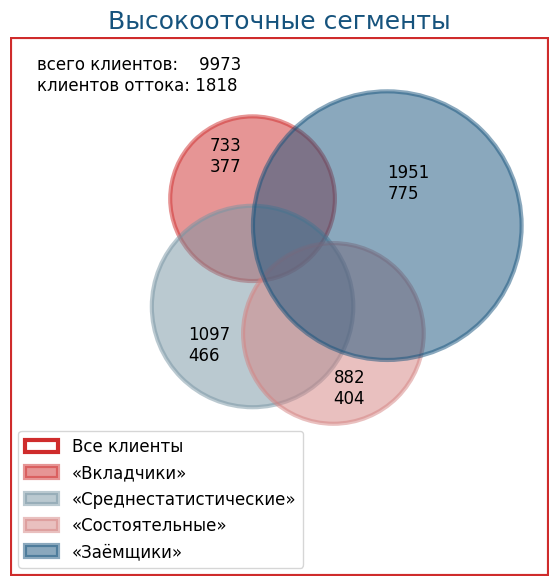

In [95]:
fig, ax = plt.subplots(figsize=(7,7))
ax.set_aspect(1)

# расстояния кругов от цента, которые будем менять чтобы отрегулировать расположение
x = [.45, .45, .6, .7]
y = [.7, .5, .45, .65]

# расстояния для надписей
a = [.37, .33, .6, .7]
b = [.75, .4, .32, .7]

# радиусы кругов на графике (делим на 100, т.к. у нас 10 тыс.пользователей)
list_tmp = ((seg.users/3.1416)**.5)/100

# квадрат всех клиентов
rect = plt.Rectangle((0, 0), 1, 1, linewidth=3, color=color_list[0], fill=False)
ax.add_artist(rect)

# круги сегментов
for i in range(0,4):
    circle = plt.Circle((x[i], y[i]), list_tmp[i], color=color_list[i], linewidth=3, alpha = .5)
    ax.add_artist(circle)
    val_tmp = str(seg.loc[i, 'users']) + '\n' + str(seg.loc[i, 'churn'])
    ax.text(a[i], b[i], val_tmp, fontsize=12)

# подписи
val_tmp = 'всего клиентов:    ' + str(len(bank)) 
val_tmp += '\nклиентов оттока: ' + str(bank.churn.sum())
ax.text(.05, .9, val_tmp, fontsize=12)    
     
ax.legend(['Все клиенты', '«Вкладчики»', '«Среднестатистические»', '«Состоятельные»', '«Заёмщики»']) 
plt.axis('off')
plt.title('Высокооточные сегменты', size=18, color=color_list[3])
plt.show;

### Выгрузка таблицы для создания дашборда

Построим диаграмму в Tableau, отражающую 
- количество клиентов в зависимости от числа используемых продуктов;
- с индикатором процента ушедших клиентов
- и с фильтром по городу.

<div id="csv">Для создания дашбордов в Tableau выгрузим нужные данные.</div>

In [96]:
bank[['churn', 'salary', 'card', 'products', 'city']].to_csv('bank.csv', index=False)

<h2 style="color:navy">Выводы</h2>

По особенностям распределения данных:
1. Наш банк покинула почти пятая часть всех клиентов ( ≈ 20%). 
2. Среди клиентов оттока доля мужчин выше и разница эта статистически значима. Причина не ясна, Возможно это связано с нехваткой новинок, выгодных предложений п т.п. в наших региональных отделениях.
3. Замечено, что клиенты в возрасте от 25 до 25 или от 50 до 60 чаще уходят, чем остальные. Скорее всего это связано с социальными изменениями у людей этих возрастов.
4. Чем выше баланс на счету и оценка собственности, тем больше доля оттока клиентов. Скорее всего причина не в том, что уходят богатые клиенты, а в том, что люди тратят свои сбережения на крупные покупки, после чего необходимость в банковских услугах в прежнем объёме отпадает. 
6. Как правило уходят неактивные клиенты. Т.е. уход из банка в этих случаях происходит постепенно. Сначала пропадает интерес или небоходимость, затем клиент отказывается от наших услуг.
7. Клиенты с низким уровнем кредитного скоринга остаются в банке чаще. Также скорее всего причина не в самой оценке кредитоспособности, а в том, что клиенты ещё не расплатились по кредитам. 

По влиянию на отток:
- Наибольшим образом на отток влиют оценка собственности, размер баланса и отсутствие или закрытие счета. Что вобщем-то неудивительно.    
- Город, также как и уровень доходов показали очень низкие уровни коэффициентов корреляции с оттоком.


По проверке гипотез:
- все проверенные гипотезы показали статистически значимую разницу для клиентов оттока и тех, кто остался. 

<hr style="background-color:navy; align:left; height:2pt">

<div style ="color:navy; font-size:16pt"><b>Рекомендации</b></div>

В ходе исследования было выделено **4** высокооточных сегмента пользователей. Сформулируем рекомендации по работе с каждой из  групп. Названия для сегментов, как и предположение о характере клиентов указанных категорий конечно условно. Но в силу большого количества данных, наверняка найдутся клиенты, похожие на наше предположение. 

1. **Обычные клиенты с целевыми накоплениями**

- следует продумать варианты привлечения клиентов, совершивших крупные покупки и траты, желающих закрыть свои счета. Похоже, что клиенты уходят, потеряв интерес к услугам банка после крупных приобретений. 
- Можно попробовать предложить скидки на обслуживание, выгодные предложения по другим банковским услугам. Т.е.  мотивировать клиентов остаться даже при нулевом балансе на счетах. 

2. **Среднестатистические клиенты**

- Клиенты со средним доходом могут уходить из банка в силу социальных и т.п. изменений, а также при отстутсвии небоходимости в банке вообще. 
- Может быть использовать какие-то выгодные тарифы по зарплатным счетам, кэшбек, удобство оплаты заказов в интернет-магазинах, доступность недорогого или бесплатного перевода средств с/на счета.
- Любые регулярно необходимые услуги для обычных клиентов также подойдут, если получится их должным образом предложить. 

3. **Руководство среднего звена**

Напомню, что это условные названия. Но все же 
- прогресс пока никому не мешал;
- сравним условия по вкладам и счетам с конкурентами; 
- есть ли у нас интересные новинки и возможности? 
- современно ли выглядят наши офисы, есть ли привлекательные операционистки;
- есть ли у банка мобильное приложение? Насколько оно удобно и понятно?

4. **Заёмщики**

Почему-то в нашем банке не нравится тем, у кого неплохой кредитный рейтинг. Тогда как ненадёжные заёмщики чаще остаются. Есть подозрения, что после того, как наши замщики раслатятся по кредитам, тоже захотят нас покинуть. 
- какие есть выгодные предожения для тех, кто уже кредитовался в нашем банке? 
- как быстро оформляется кредит

**Общие рекомендации**

- можно попробовать провести опрос ушедших клиентов, узнать о причинах;
- изучить новинки и найти возможность предложить какие-то бонусы или выгодные предложения клиентам;
- позаботиться об уютной атмосфере в отделениях;
- подумать, не стоит ли переименовать наш банк в более приятное название. 

<div style ="color:navy"><b>Презентация</b></div>

По результатам исследования были подготовлены <a href="https://drive.google.com/uc?export=download&id=1PSwpXS9eUn6lwWg3UWKkZLsnZDiwDzKv">презентация</a>
и <a href="https://public.tableau.com/views/_16802092224080/sheet0?:language=en-US&:display_count=n&:origin=viz_share_link">дашборд</a>